슬라이딩 윈도우, 이동편균, 차분

In [1]:
common_columns = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP', 'label']

In [2]:
common_columns2 = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
       'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP']

In [3]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import os
import csv
from tqdm import tqdm
pathList = []
##1. 패스 생성
homePath = 'train/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
def load_csv(pathList):
    for a,file in tqdm(enumerate(pathList)):
        df = pd.read_csv(file)
        df['label'] = pathList[a].split('/')[1]
        dfs.append(df)
    return dfs
load_csv(pathList)


train = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
train = train.dropna(axis=1)

806it [00:07, 101.90it/s]


In [4]:
pathList = []
##1. 패스 생성
homePath = 'test/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
load_csv(pathList)

test = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
test = test.dropna(axis=1)

206it [00:03, 61.39it/s]


In [5]:
# 단일 : Normal, SP, LACP, LOF, ATWS, TT  
#idx = train[(train['label']  == 'LOF') | (train['label']  == 'NORM') | (train['label'] == 'SP') | (train['label'] == 'LACP') | (train['label'] == 'ATWS') | (train['label'] == 'TT')].index
#train.drop(idx, axis = 0, inplace=True)
#idx = test[(test['label']  == 'LOF') | (test['label']  == 'NORM') | (test['label'] == 'SP') | (test['label'] == 'LACP') | (test['label'] == 'ATWS') | (test['label'] == 'TT')].index
#test.drop(idx, axis = 0, inplace=True)

In [6]:
# 데이터 축소
train = train[train['TIME'] <= 3500]
test = test[test['TIME'] <= 3500]

In [7]:
# 30초 간격으로 데이터 축소해보기
trian = train[train['TIME'] % 30 == 0]
train.reset_index(drop=True, inplace = True)
test = test[test['TIME'] % 30 == 0]
test.reset_index(drop=True, inplace = True)

In [8]:
# 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])
test['label'] = le.fit_transform(test['label'])

In [9]:
le.classes_

array(['ATWS', 'FLB', 'LACP', 'LLB', 'LOCA', 'LOCAC', 'LOF', 'LR', 'MD',
       'NORM', 'SGATR', 'SGBTR', 'SLBIC', 'SLBOC', 'SP', 'TT'],
      dtype=object)

---

---

In [10]:
# xgboost  실행
from xgboost import XGBClassifier
Y_train = train['label']
Y_test = test['label']
train = train.drop(['label', 'TIME'], axis = 1)
test = test.drop(['label', 'TIME'], axis = 1)

In [11]:
%%time
# 훈련
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y_train, test_size=0.2)
xgb = XGBClassifier(tree_method = 'gpu_hist',  
                    predictor = 'gpu_predictor',
                    n_estimators = 1000, 
                    objective = 'multi:softproba',
                    learning_rate = 0.01,
                    scale_pos_weight=100,
                    seed=1214
                   )
xgb_model = xgb.fit(X_train, y_train, eval_metric = 'mlogloss', eval_set = [(X_test, y_test)], early_stopping_rounds=25)

C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[16:13:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:2.69551
[1]	validation_0-mlogloss:2.62425
[2]	validation_0-mlogloss:2.55802
[3]	validation_0-mlogloss:2.49615
[4]	validation_0-mlogloss:2.43806
[5]	validation_0-mlogloss:2.38330
[6]	validation_0-mlogloss:2.33152
[7]	validation_0-mlogloss:2.28244
[8]	validation_0-mlogloss:2.23580
[9]	validation_0-mlogloss:2.19132
[10]	validation_0-mlogloss:2.14885
[11]	validation_0-mlogloss:2.10820
[12]	validation_0-mlogloss:2.06925
[13]	validation_0-mlogloss:2.03185
[14]	validation_0-mlogloss:1.99579
[15]	validation_0-mlogloss:1.96115
[16]	validation_0-mloglos

[219]	validation_0-mlogloss:0.23116
[220]	validation_0-mlogloss:0.22920
[221]	validation_0-mlogloss:0.22727
[222]	validation_0-mlogloss:0.22535
[223]	validation_0-mlogloss:0.22346
[224]	validation_0-mlogloss:0.22159
[225]	validation_0-mlogloss:0.21972
[226]	validation_0-mlogloss:0.21789
[227]	validation_0-mlogloss:0.21607
[228]	validation_0-mlogloss:0.21427
[229]	validation_0-mlogloss:0.21247
[230]	validation_0-mlogloss:0.21071
[231]	validation_0-mlogloss:0.20896
[232]	validation_0-mlogloss:0.20723
[233]	validation_0-mlogloss:0.20551
[234]	validation_0-mlogloss:0.20382
[235]	validation_0-mlogloss:0.20214
[236]	validation_0-mlogloss:0.20047
[237]	validation_0-mlogloss:0.19883
[238]	validation_0-mlogloss:0.19719
[239]	validation_0-mlogloss:0.19558
[240]	validation_0-mlogloss:0.19399
[241]	validation_0-mlogloss:0.19239
[242]	validation_0-mlogloss:0.19082
[243]	validation_0-mlogloss:0.18927
[244]	validation_0-mlogloss:0.18773
[245]	validation_0-mlogloss:0.18622
[246]	validation_0-mlogloss:

[446]	validation_0-mlogloss:0.05152
[447]	validation_0-mlogloss:0.05129
[448]	validation_0-mlogloss:0.05106
[449]	validation_0-mlogloss:0.05084
[450]	validation_0-mlogloss:0.05062
[451]	validation_0-mlogloss:0.05040
[452]	validation_0-mlogloss:0.05018
[453]	validation_0-mlogloss:0.04998
[454]	validation_0-mlogloss:0.04976
[455]	validation_0-mlogloss:0.04955
[456]	validation_0-mlogloss:0.04934
[457]	validation_0-mlogloss:0.04913
[458]	validation_0-mlogloss:0.04893
[459]	validation_0-mlogloss:0.04873
[460]	validation_0-mlogloss:0.04853
[461]	validation_0-mlogloss:0.04833
[462]	validation_0-mlogloss:0.04813
[463]	validation_0-mlogloss:0.04794
[464]	validation_0-mlogloss:0.04775
[465]	validation_0-mlogloss:0.04756
[466]	validation_0-mlogloss:0.04737
[467]	validation_0-mlogloss:0.04719
[468]	validation_0-mlogloss:0.04701
[469]	validation_0-mlogloss:0.04683
[470]	validation_0-mlogloss:0.04665
[471]	validation_0-mlogloss:0.04646
[472]	validation_0-mlogloss:0.04629
[473]	validation_0-mlogloss:

[674]	validation_0-mlogloss:0.02888
[675]	validation_0-mlogloss:0.02884
[676]	validation_0-mlogloss:0.02880
[677]	validation_0-mlogloss:0.02877
[678]	validation_0-mlogloss:0.02873
[679]	validation_0-mlogloss:0.02869
[680]	validation_0-mlogloss:0.02865
[681]	validation_0-mlogloss:0.02861
[682]	validation_0-mlogloss:0.02858
[683]	validation_0-mlogloss:0.02854
[684]	validation_0-mlogloss:0.02850
[685]	validation_0-mlogloss:0.02847
[686]	validation_0-mlogloss:0.02843
[687]	validation_0-mlogloss:0.02840
[688]	validation_0-mlogloss:0.02836
[689]	validation_0-mlogloss:0.02832
[690]	validation_0-mlogloss:0.02829
[691]	validation_0-mlogloss:0.02826
[692]	validation_0-mlogloss:0.02822
[693]	validation_0-mlogloss:0.02819
[694]	validation_0-mlogloss:0.02816
[695]	validation_0-mlogloss:0.02812
[696]	validation_0-mlogloss:0.02810
[697]	validation_0-mlogloss:0.02806
[698]	validation_0-mlogloss:0.02803
[699]	validation_0-mlogloss:0.02800
[700]	validation_0-mlogloss:0.02797
[701]	validation_0-mlogloss:

[901]	validation_0-mlogloss:0.02356
[902]	validation_0-mlogloss:0.02354
[903]	validation_0-mlogloss:0.02352
[904]	validation_0-mlogloss:0.02350
[905]	validation_0-mlogloss:0.02348
[906]	validation_0-mlogloss:0.02346
[907]	validation_0-mlogloss:0.02344
[908]	validation_0-mlogloss:0.02342
[909]	validation_0-mlogloss:0.02340
[910]	validation_0-mlogloss:0.02337
[911]	validation_0-mlogloss:0.02336
[912]	validation_0-mlogloss:0.02334
[913]	validation_0-mlogloss:0.02332
[914]	validation_0-mlogloss:0.02329
[915]	validation_0-mlogloss:0.02327
[916]	validation_0-mlogloss:0.02324
[917]	validation_0-mlogloss:0.02322
[918]	validation_0-mlogloss:0.02320
[919]	validation_0-mlogloss:0.02317
[920]	validation_0-mlogloss:0.02315
[921]	validation_0-mlogloss:0.02313
[922]	validation_0-mlogloss:0.02310
[923]	validation_0-mlogloss:0.02308
[924]	validation_0-mlogloss:0.02306
[925]	validation_0-mlogloss:0.02303
[926]	validation_0-mlogloss:0.02301
[927]	validation_0-mlogloss:0.02299
[928]	validation_0-mlogloss:

In [12]:
pred = xgb_model.predict(test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(Y_test, pred) # 정확도 계산
precision = precision_score(Y_test, pred, average='weighted') # 정밀도 계산
recall = recall_score(Y_test, pred, average='weighted') # 재현율 계산
f1 = f1_score(Y_test, pred, average='weighted') # F1-Score 계산
# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9619118745332338
Precision: 0.9640160429405114
Recall: 0.9619118745332338
F1-Score: 0.9617727718633443


Permutation Importance: permutation_importance를 사용해 성능 감소로 중요도를 평가합니다.  

SHAP: shap 패키지를 사용하여 각 특성의 기여도를 평가합니다.  

LIME: 특정 예측을 설명할 때 로컬 해석을 제공합니다.  

PDP: 특정 특성이 예측값에 미치는 영향을 시각화합니다.  

Tree SHAP: 트리 모델에 최적화된 SHAP 값을 계산하여 기여도를 평가합니다.  

Surrogate Model: 복잡한 모델을 간단한 모델로 근사하여 중요도를 평가합니다.  

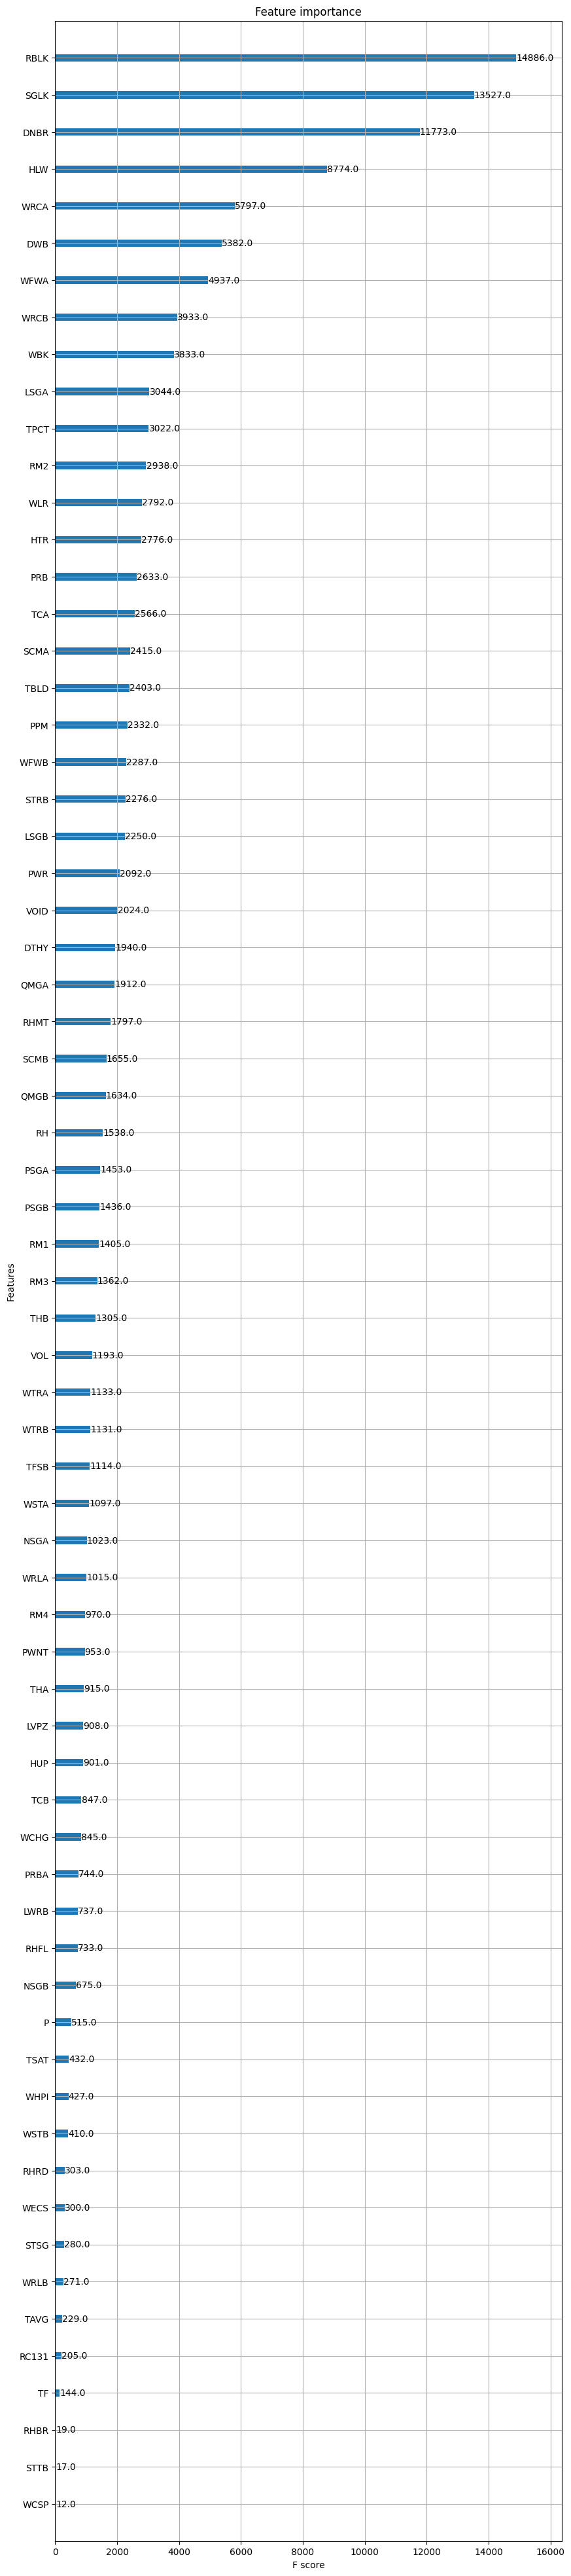

In [14]:
# Plot Importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax)
plt.show()

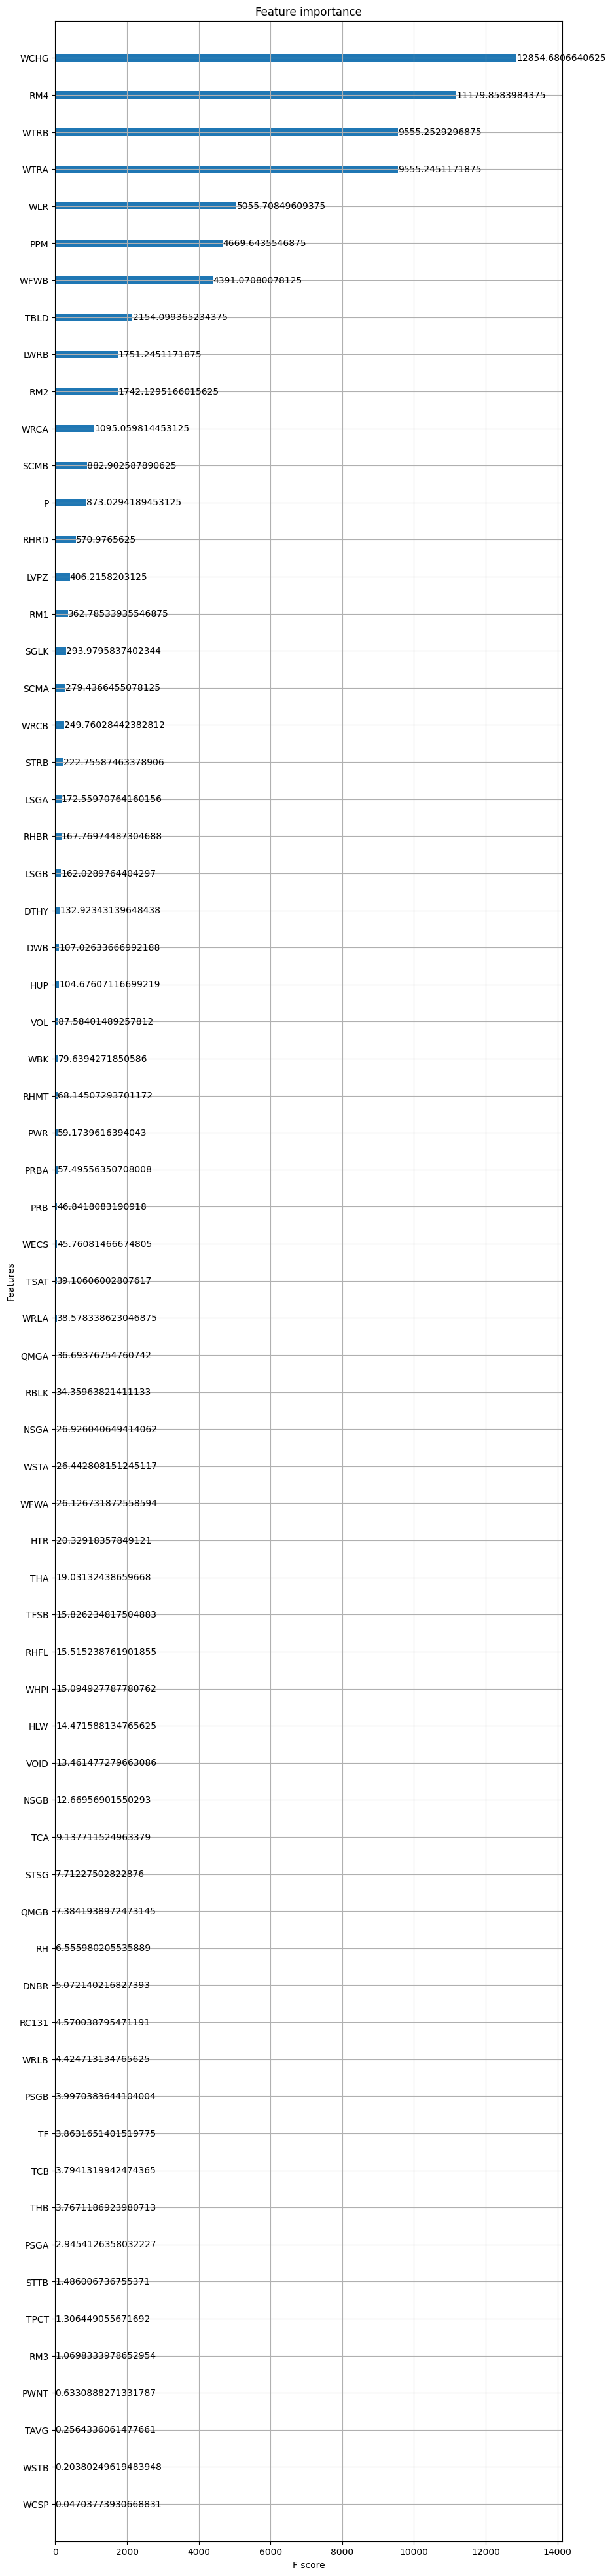

In [15]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='gain')
plt.show()

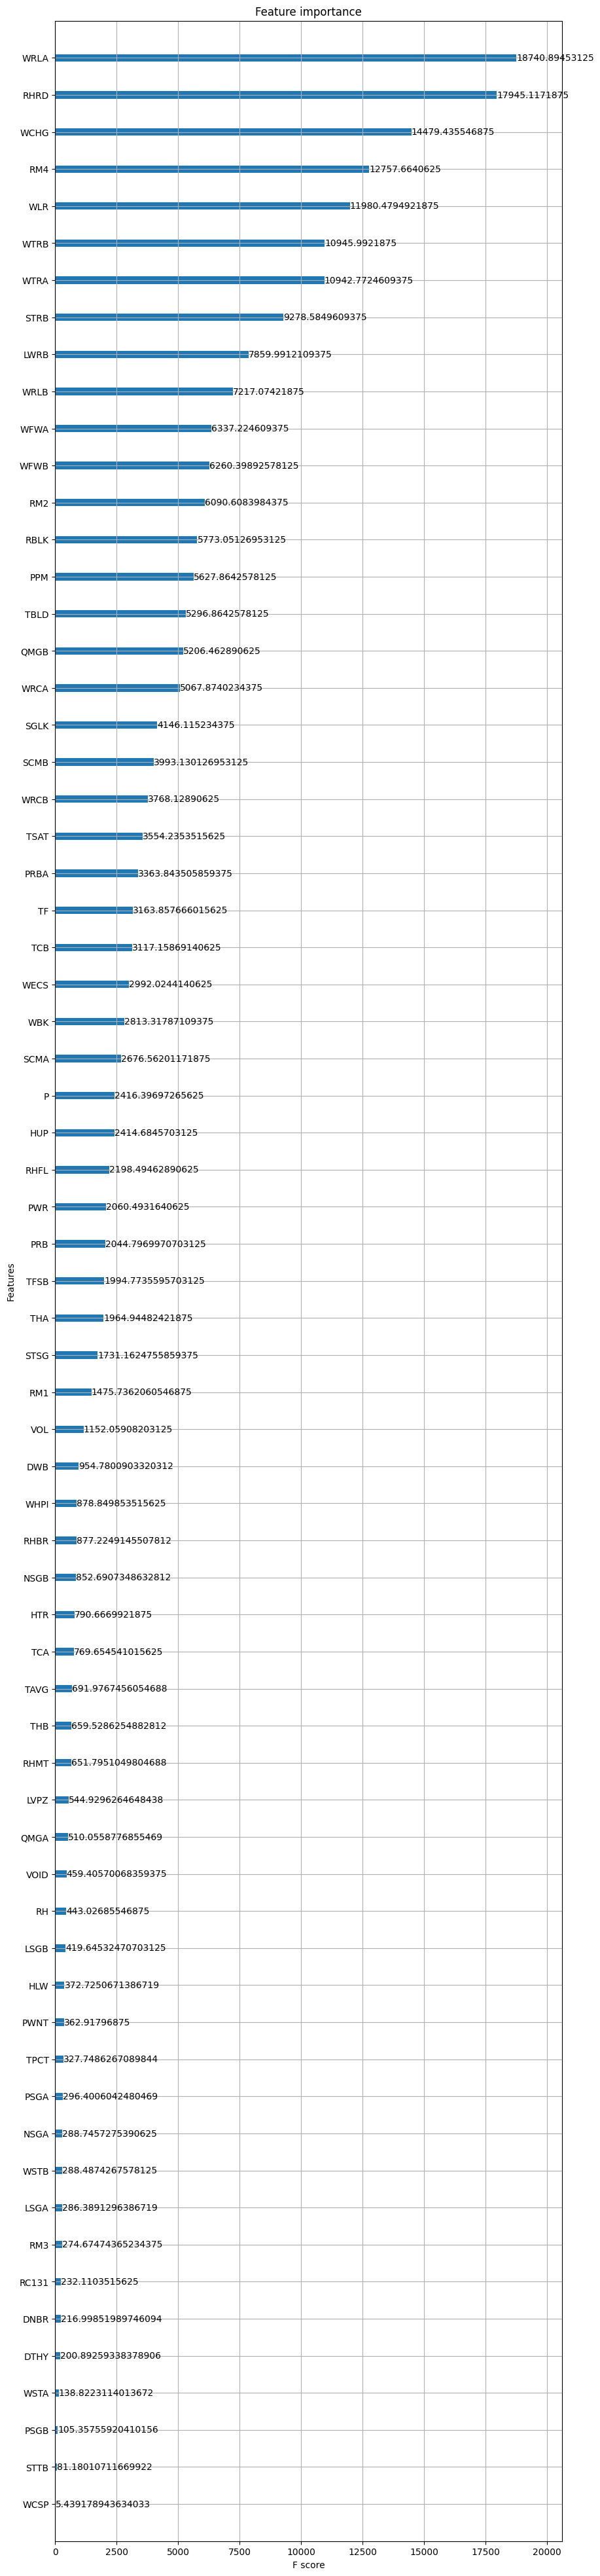

In [16]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='cover')
plt.show()

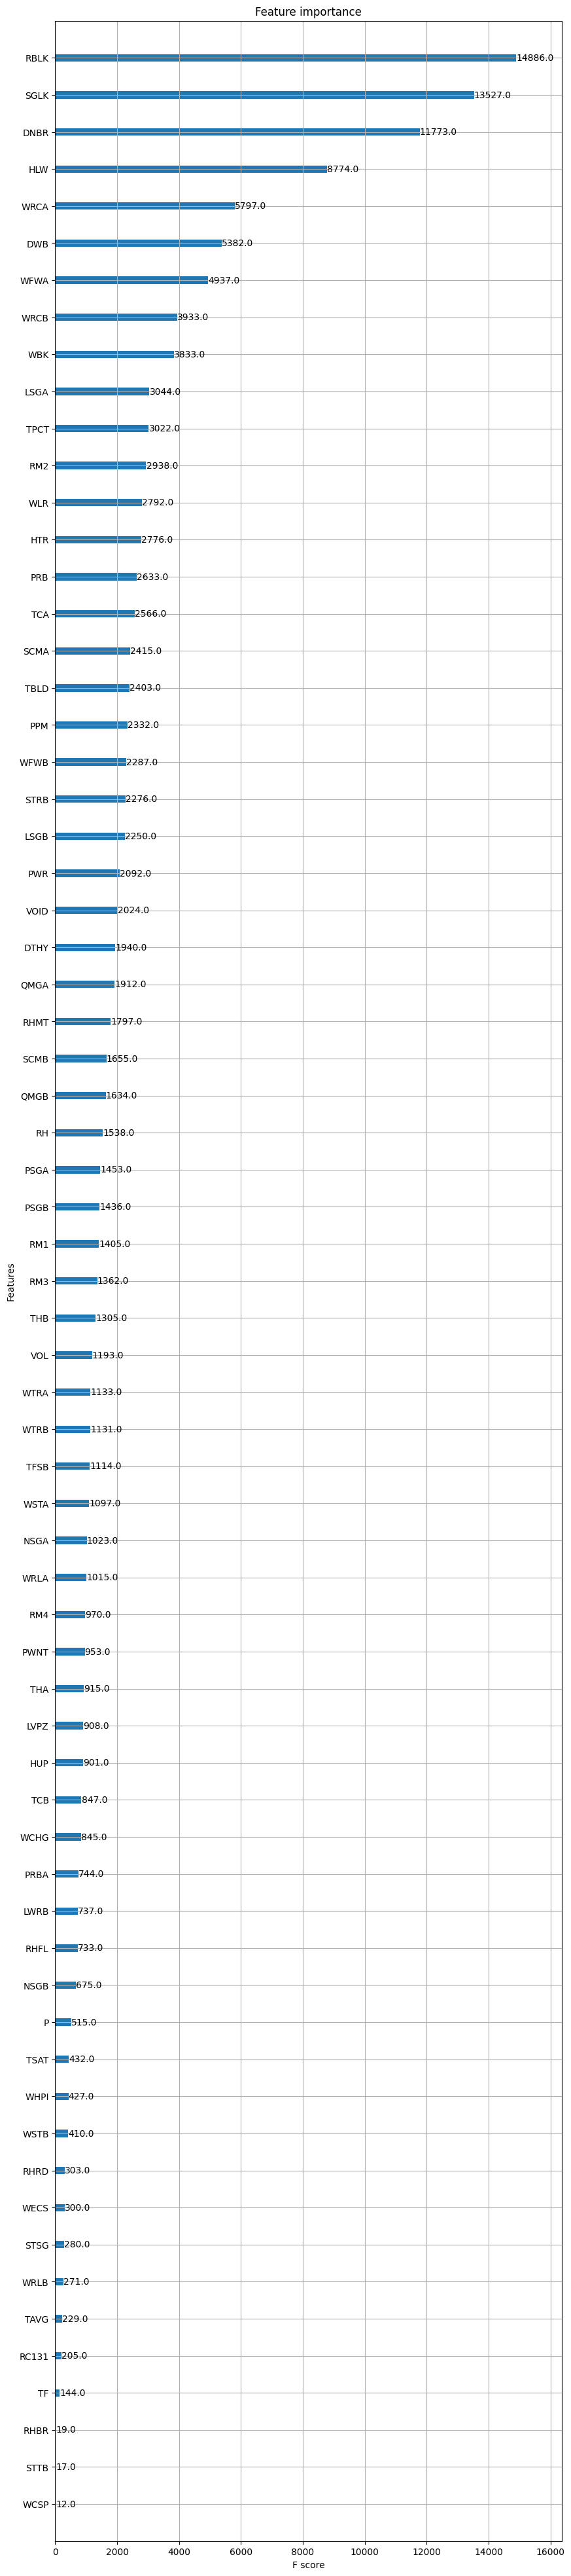

In [17]:
fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax, importance_type='weight')
plt.show()

In [18]:
from sklearn.inspection import permutation_importance
# Permutation Importance
result = permutation_importance(xgb_model, test, Y_test, n_repeats=5, random_state=1214)
# 중요도 출력
importance = result.importances_mean
for i, v in enumerate(importance):
    print(f'Feature {i}: {v}')

Feature 0: 0.00043979752717617784
Feature 1: -0.00017425939756037233
Feature 2: 0.006472491909385147
Feature 3: 0.0021574973031284195
Feature 4: 8.29806655049392e-06
Feature 5: -0.0027798522944153525
Feature 6: 0.00450585013691811
Feature 7: -4.978839930296353e-05
Feature 8: 0.0
Feature 9: -0.00011617293170691489
Feature 10: 0.0006638453240395137
Feature 11: 6.638453240395136e-05
Feature 12: -8.29806655049392e-06
Feature 13: -0.0017342959090531184
Feature 14: 0.12289436561281226
Feature 15: -0.0013193925815284224
Feature 16: -0.0037009376815201776
Feature 17: -0.00011617293170691489
Feature 18: -0.0029043232926727613
Feature 19: 3.319226620197568e-05
Feature 20: 0.00010787486515642097
Feature 21: -0.00014936519790889057
Feature 22: -0.00019915359721185412
Feature 23: 0.0
Feature 24: 0.00010787486515642097
Feature 25: -4.978839930296353e-05
Feature 26: 0.0
Feature 27: 0.00038171106132272036
Feature 28: 1.659613310098784e-05
Feature 29: 6.638453240395136e-05
Feature 30: -0.00098746991950

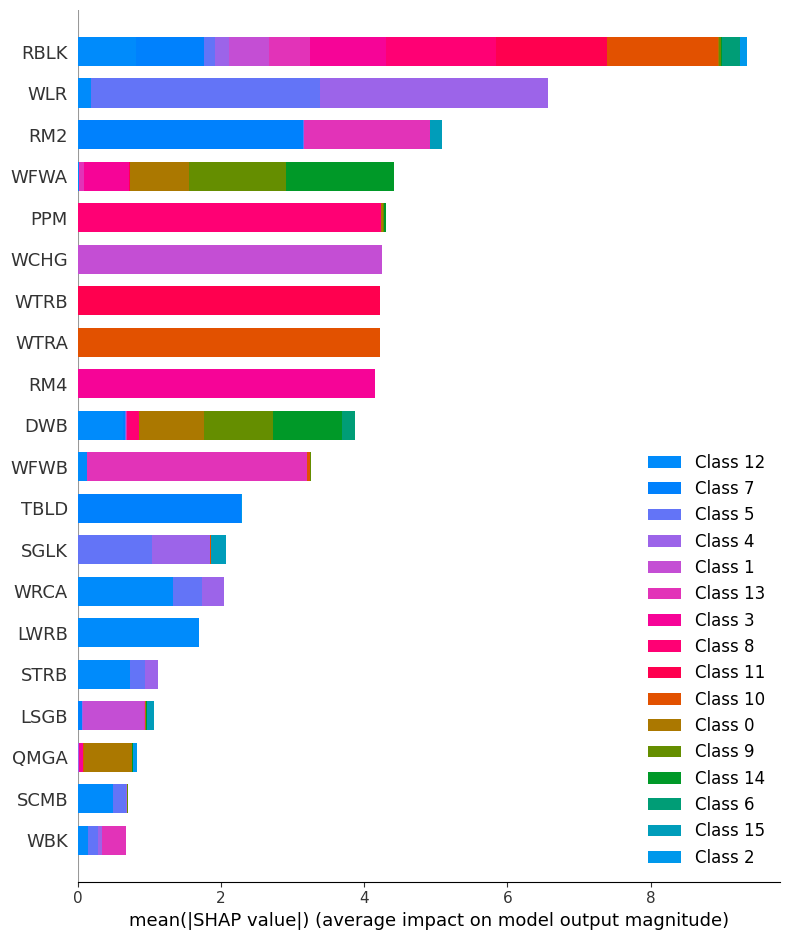

In [19]:
# Tree Shap
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(test.values, check_additivity=False)
shap.summary_plot(shap_values, test)

100%|===================| 385631/385632 [1816:48<00:00]         

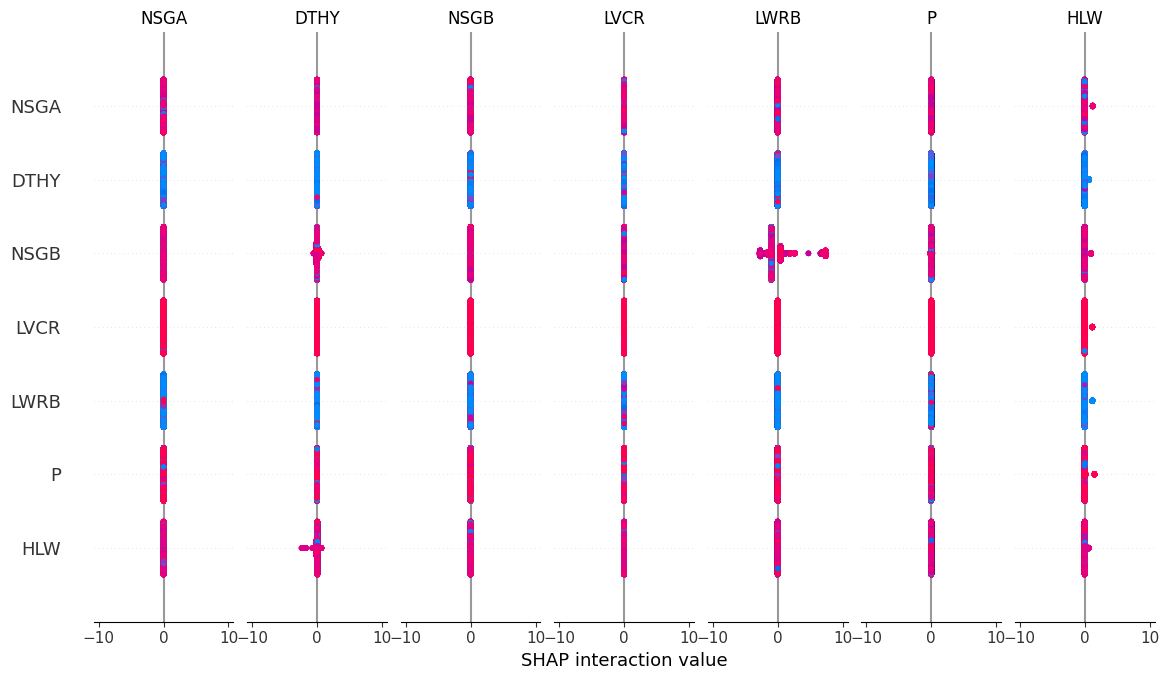

In [20]:
import shap
explainer = shap.Explainer(xgb_model,test.values)
shap_values = explainer(test.values, check_additivity=False)
shap.summary_plot(shap_values, test)

Class 0 beeswarm plot:


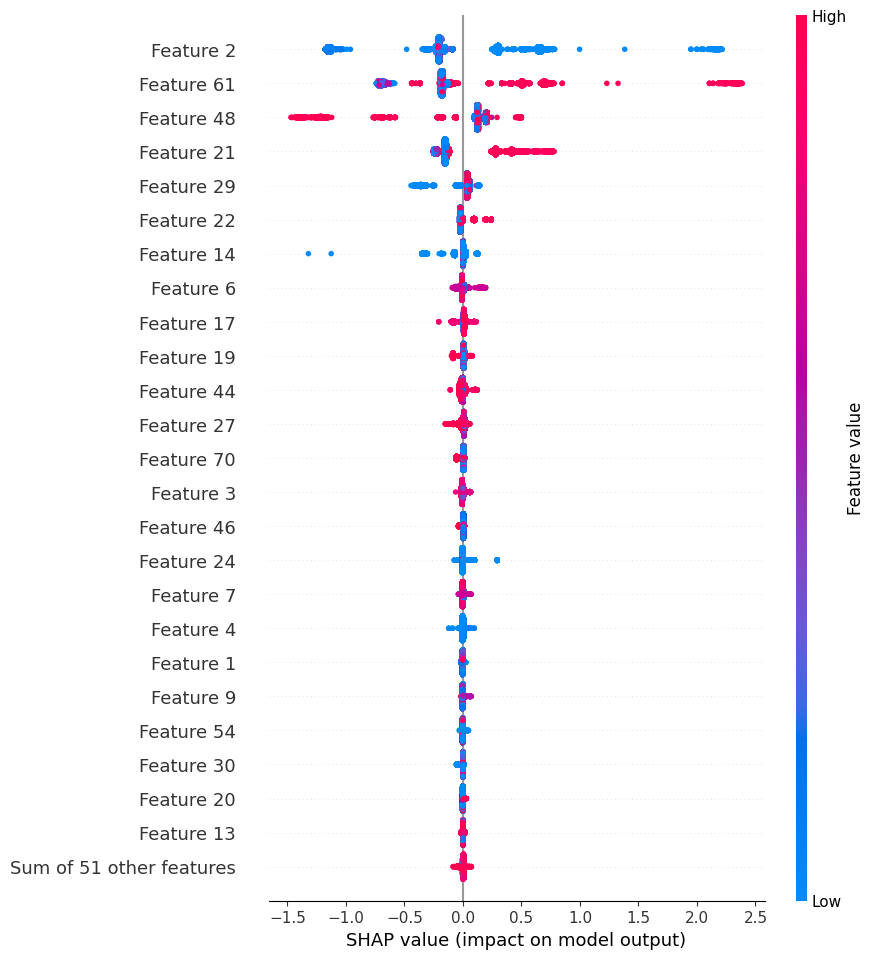

Class 1 beeswarm plot:


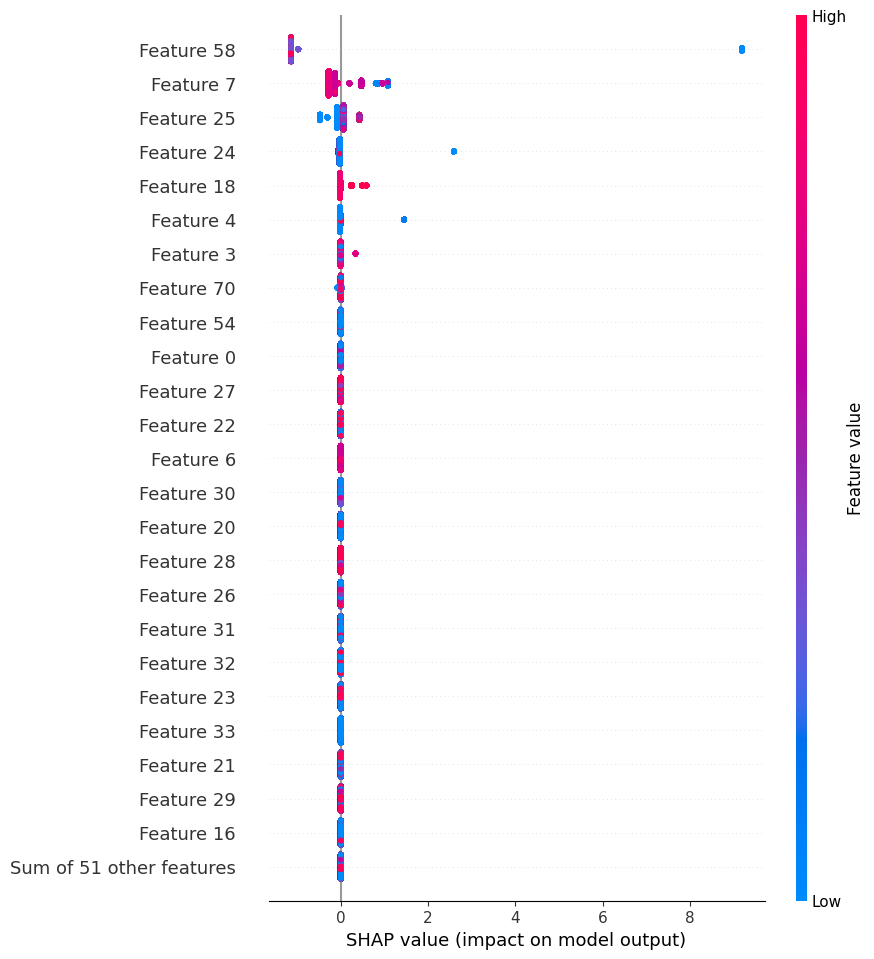

Class 2 beeswarm plot:


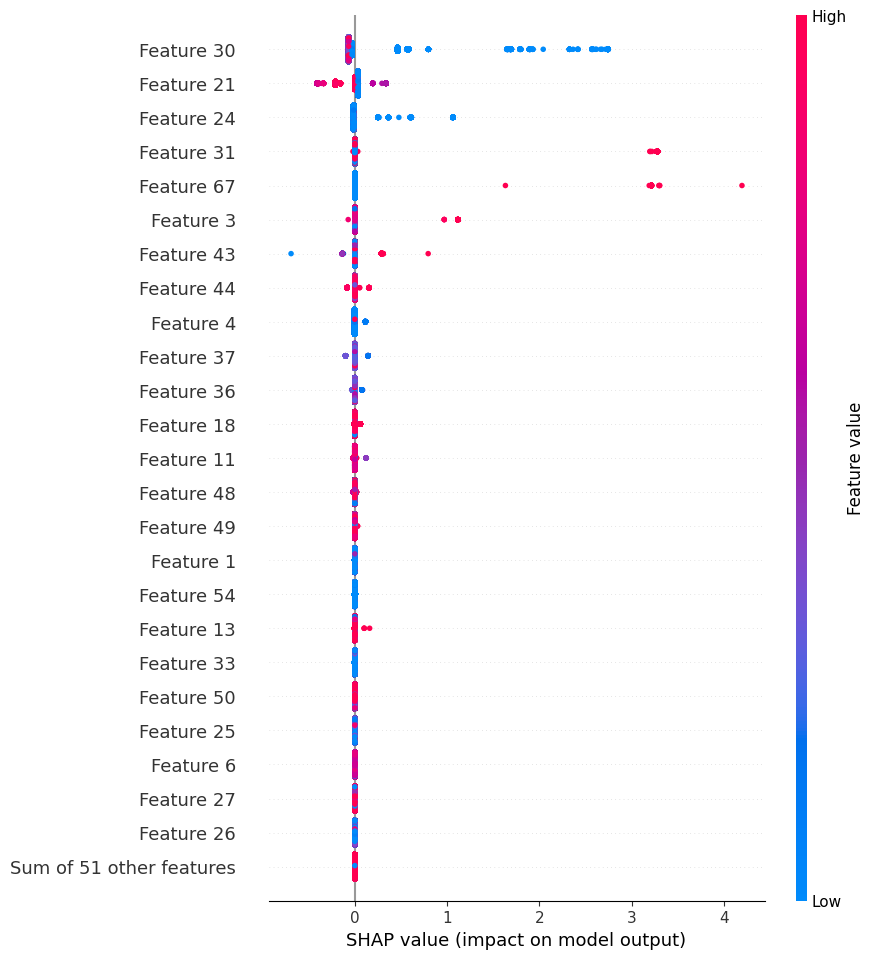

Class 3 beeswarm plot:


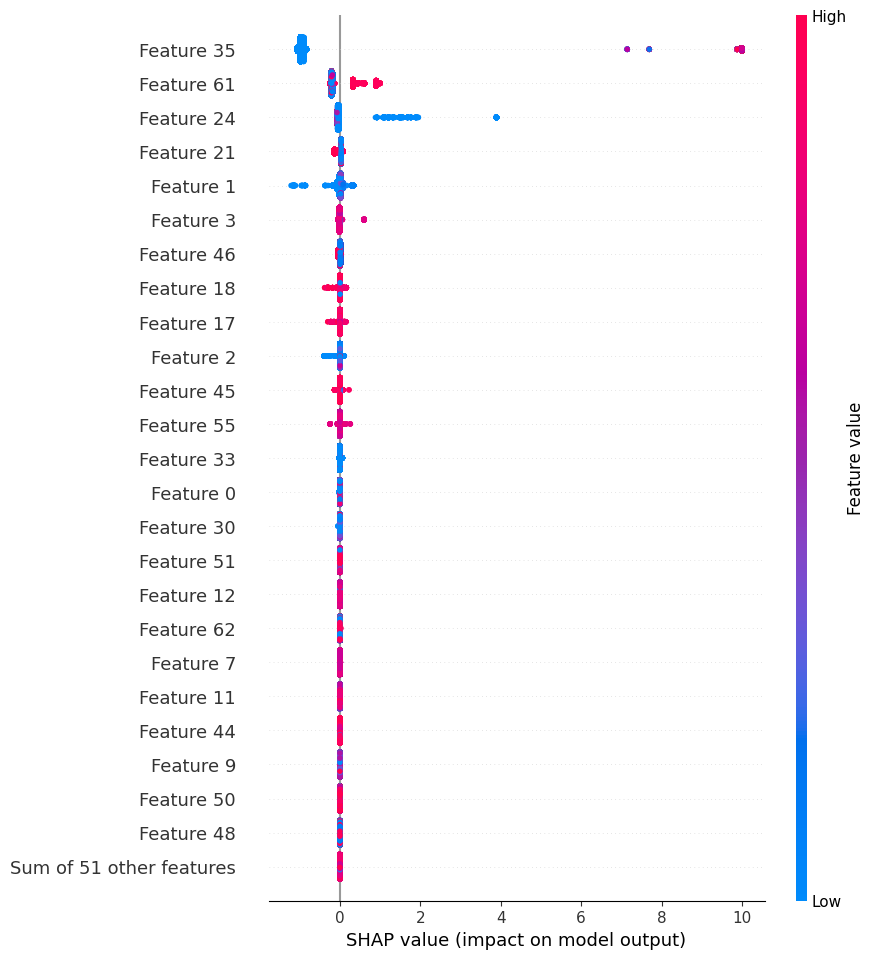

Class 4 beeswarm plot:


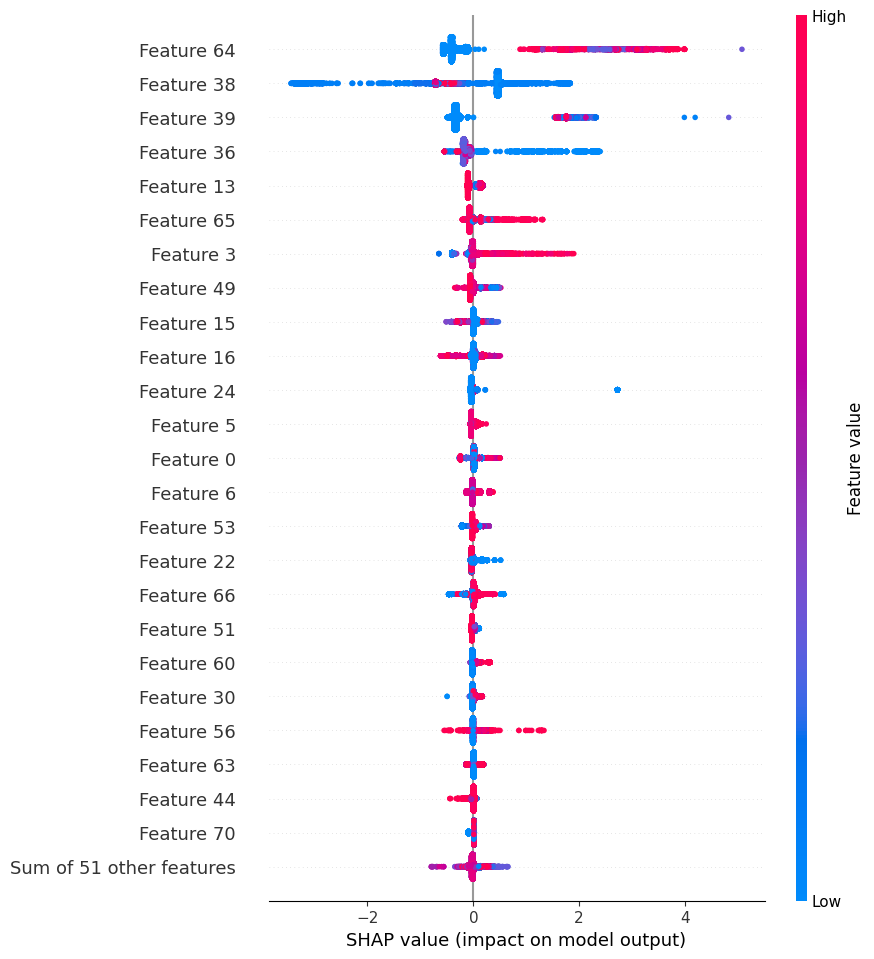

Class 5 beeswarm plot:


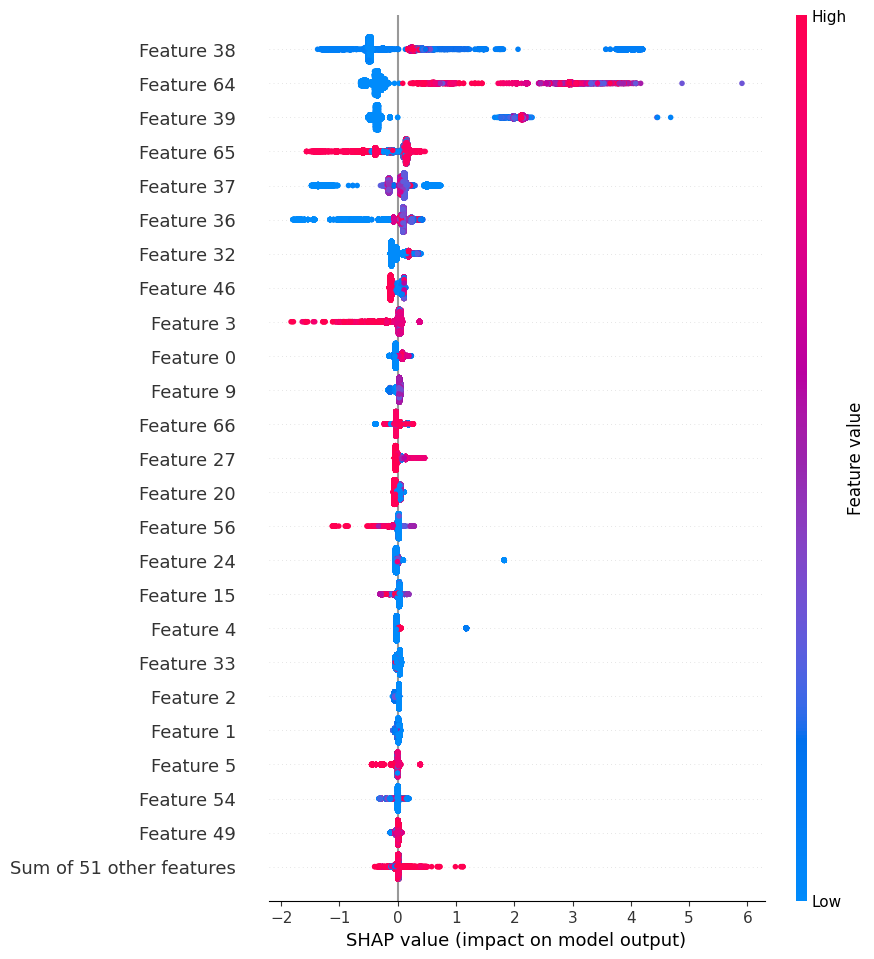

Class 6 beeswarm plot:


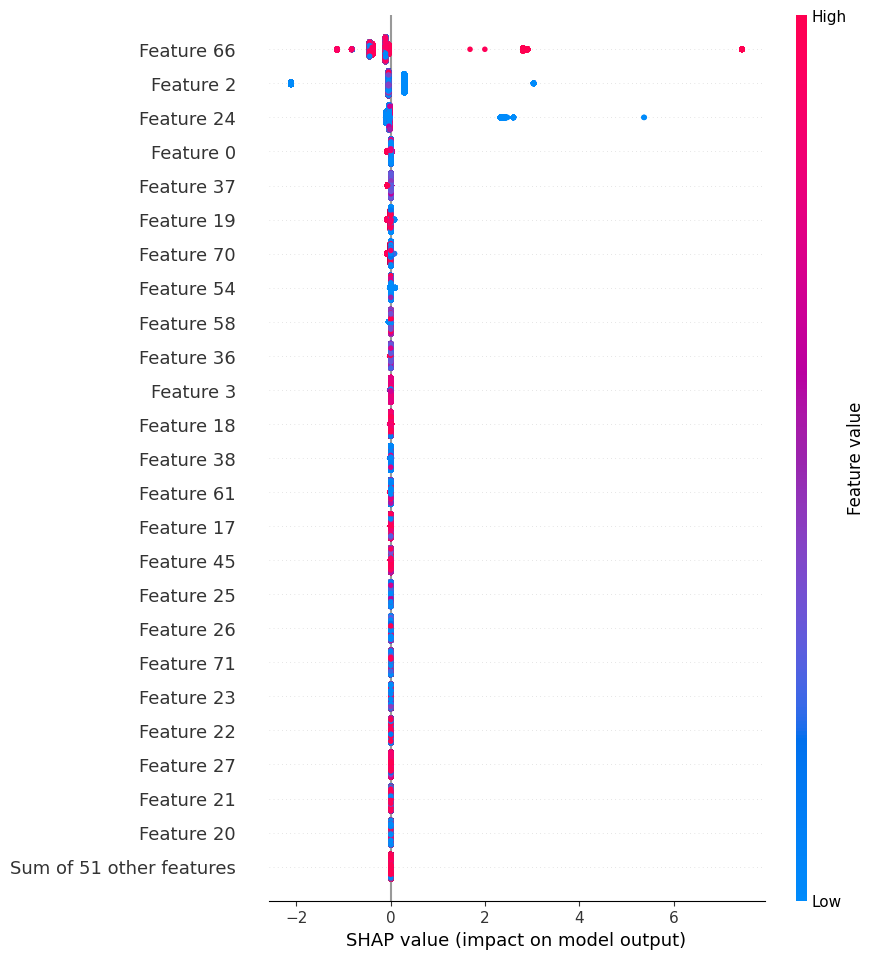

Class 7 beeswarm plot:


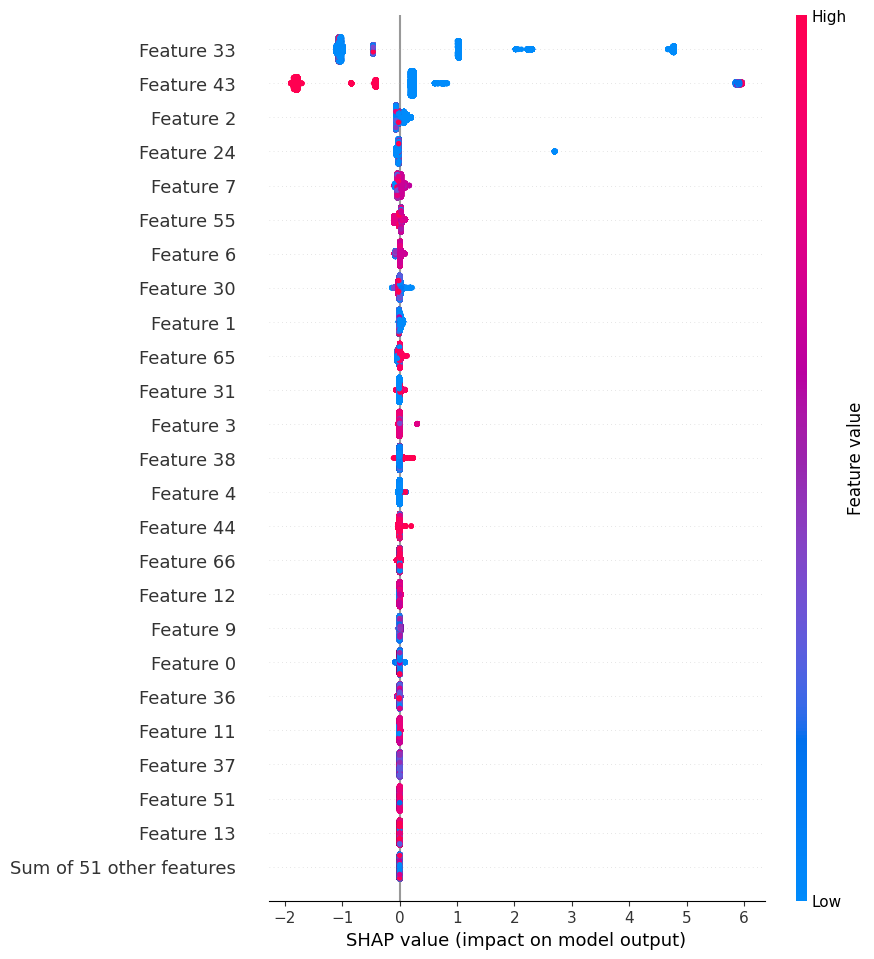

Class 8 beeswarm plot:


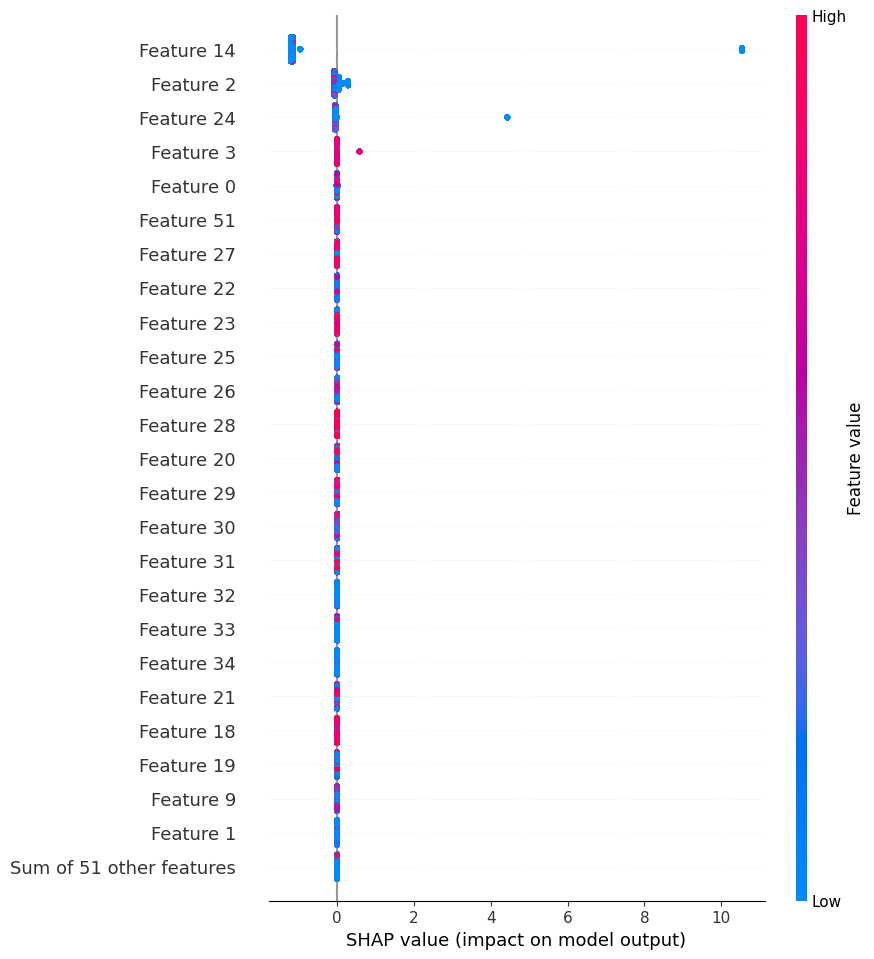

Class 9 beeswarm plot:


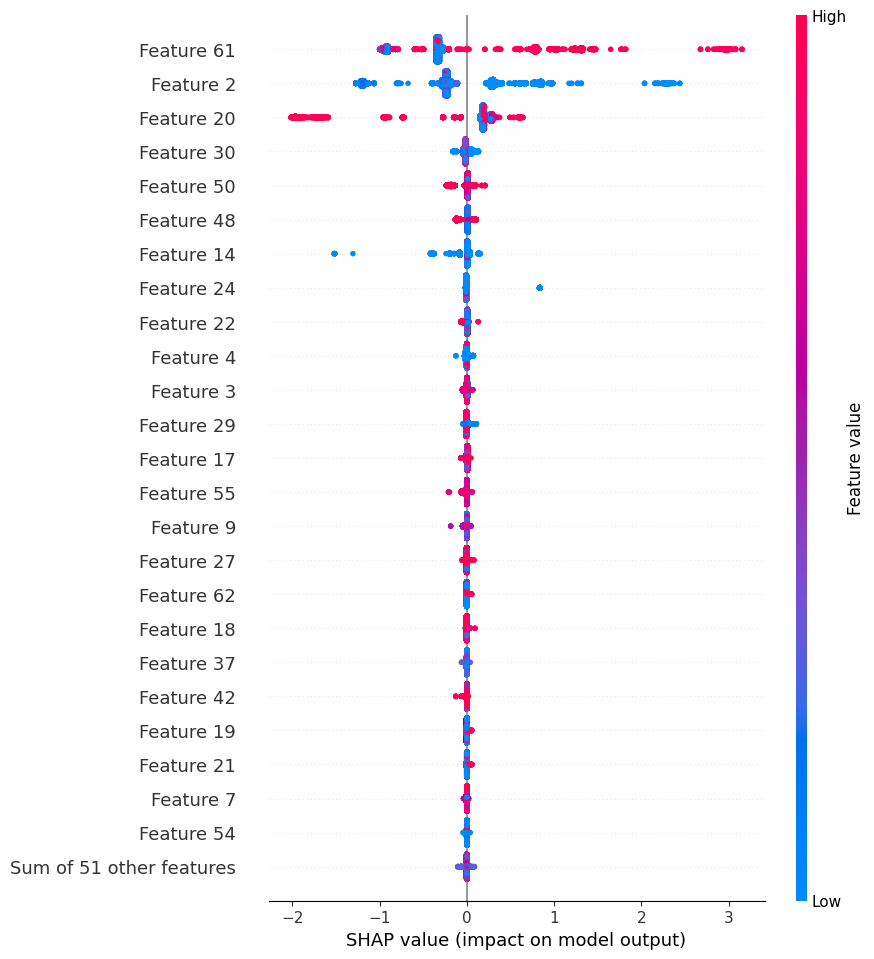

Class 10 beeswarm plot:


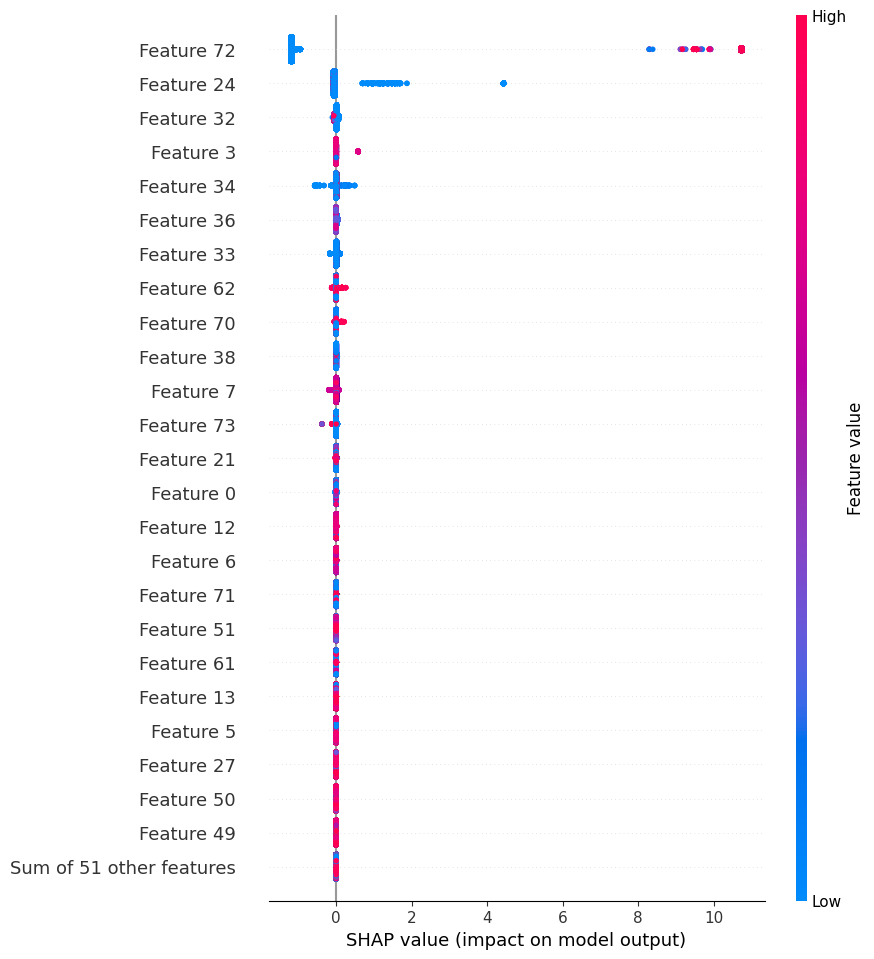

Class 11 beeswarm plot:


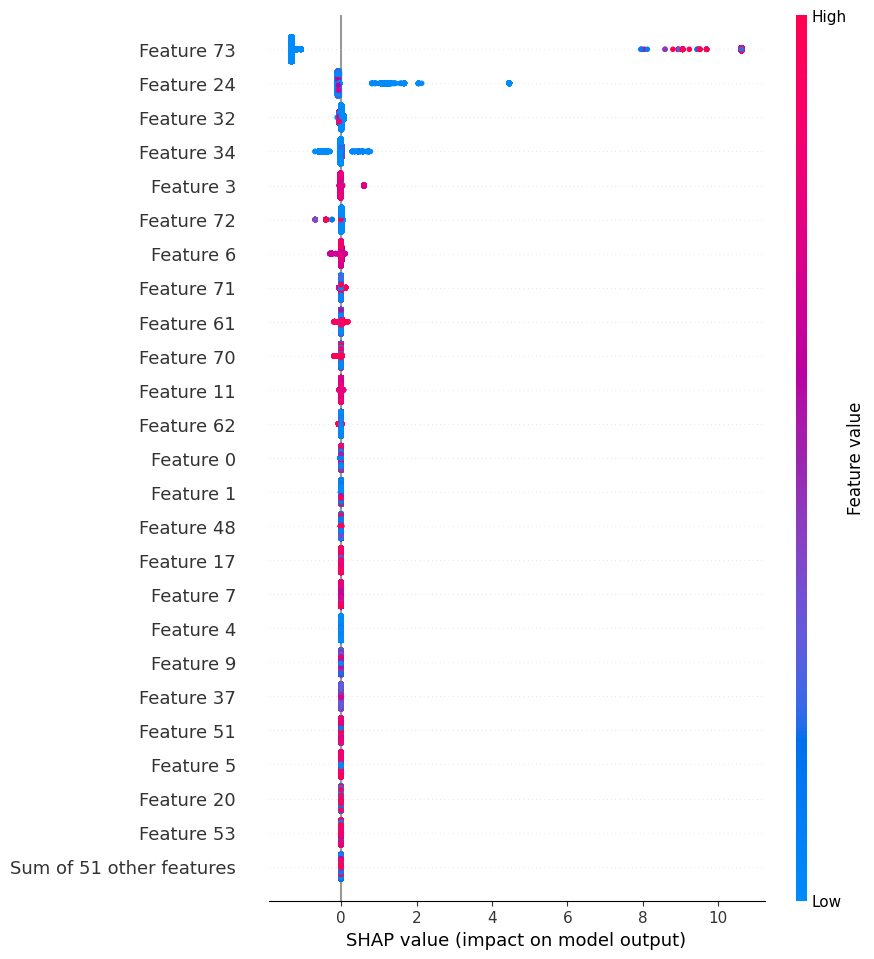

Class 12 beeswarm plot:


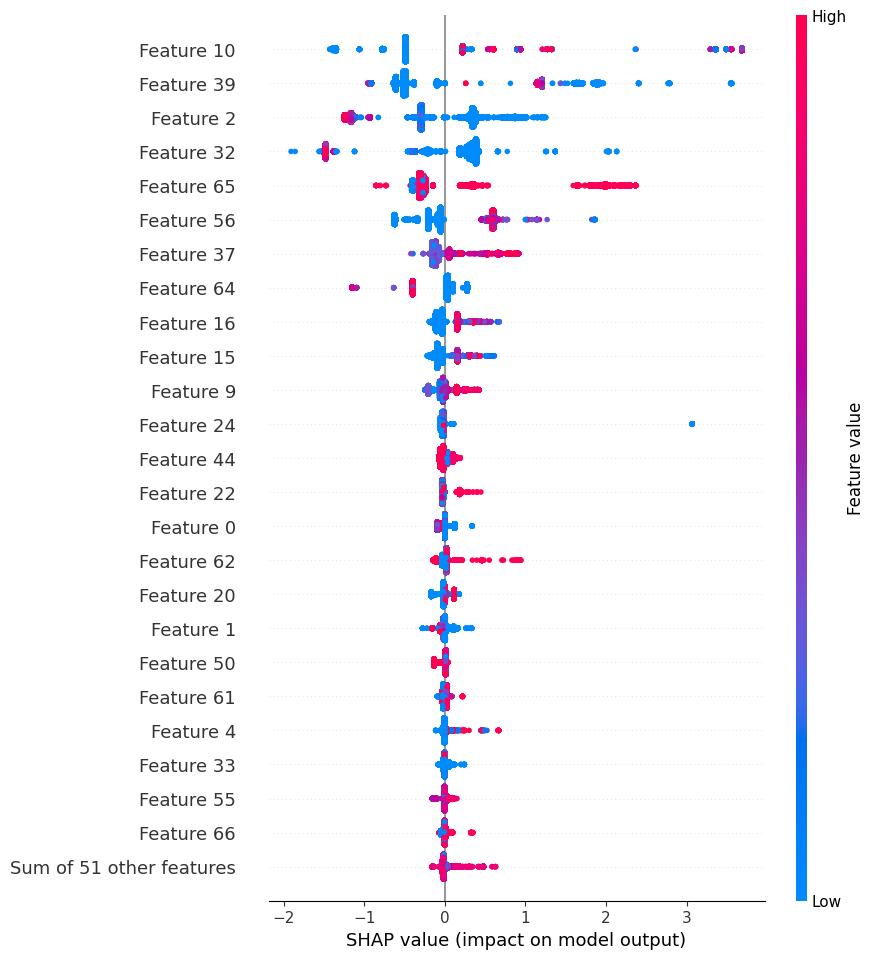

Class 13 beeswarm plot:


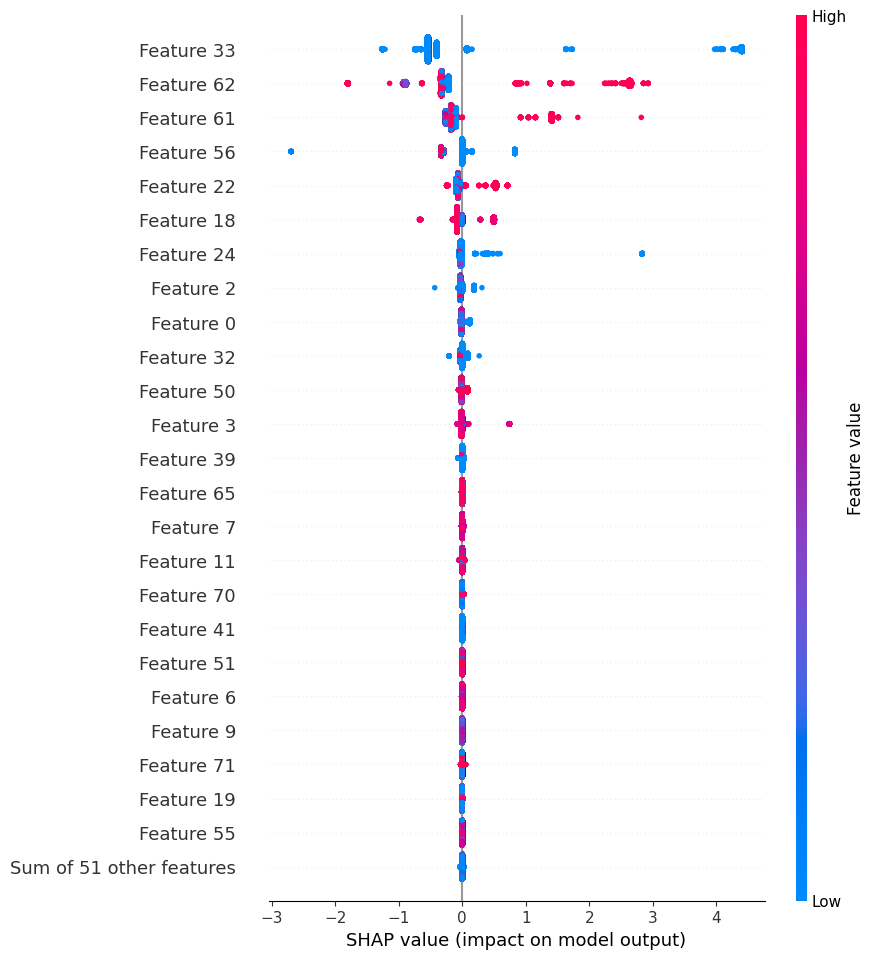

Class 14 beeswarm plot:


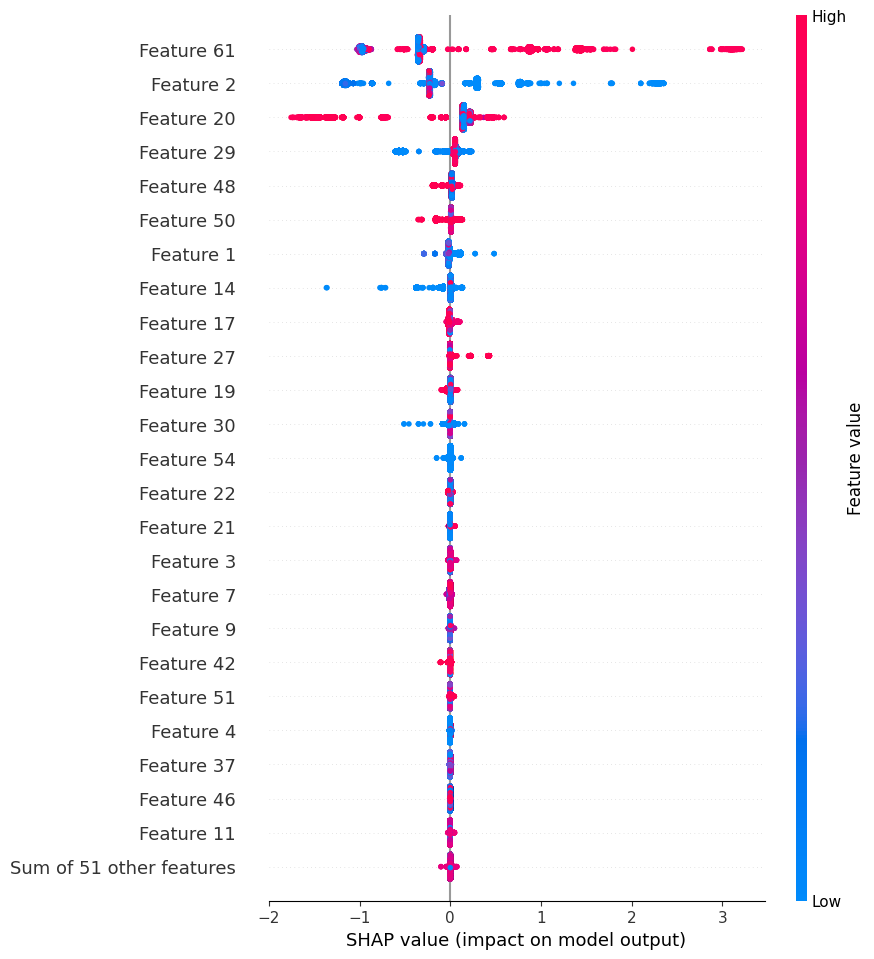

Class 15 beeswarm plot:


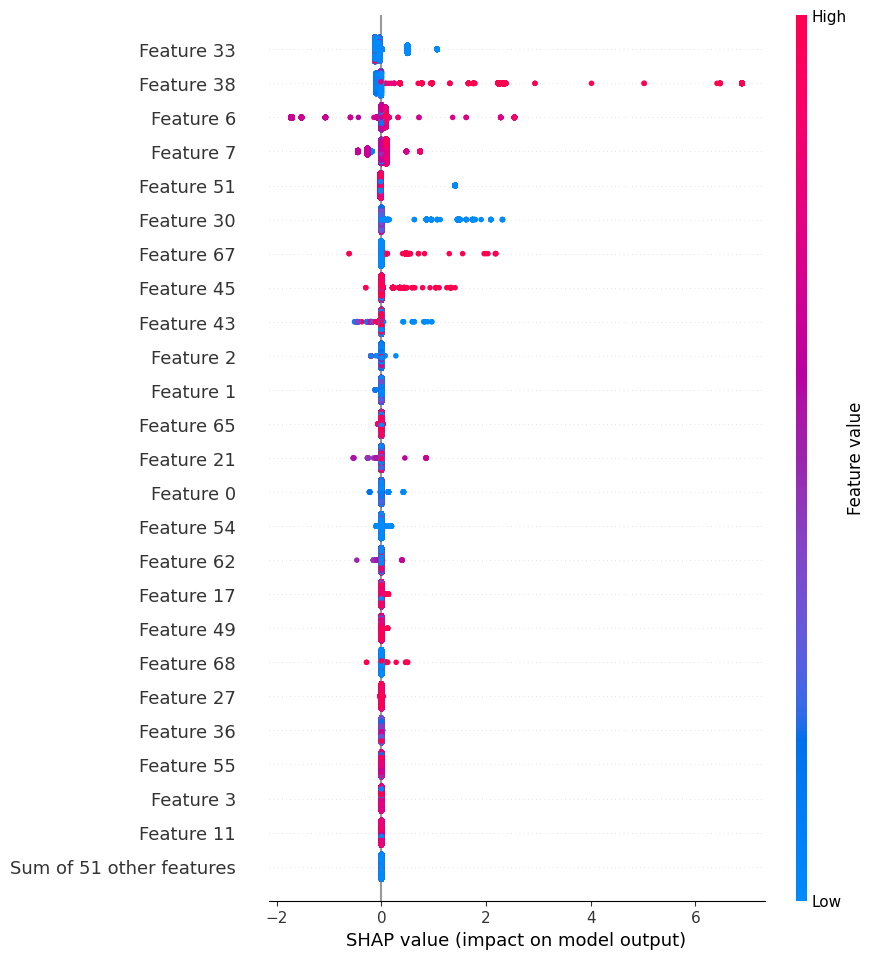

In [21]:
# 3번째 label에 대한 피처 중요도
for class_idx in range(16):
    print(f"Class {class_idx} beeswarm plot:")
    shap.plots.beeswarm(shap_values[:, :, class_idx], max_display=25)

Class 0 bar plot:


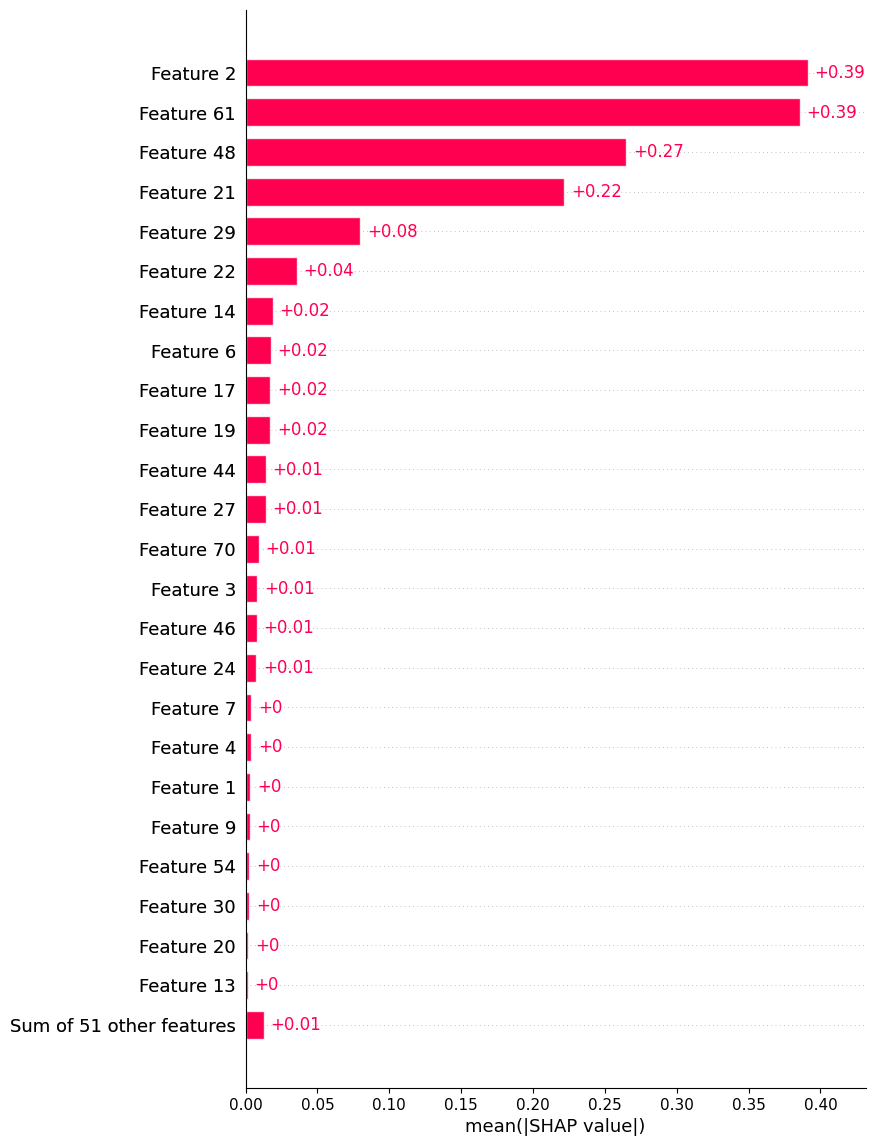

Class 1 bar plot:


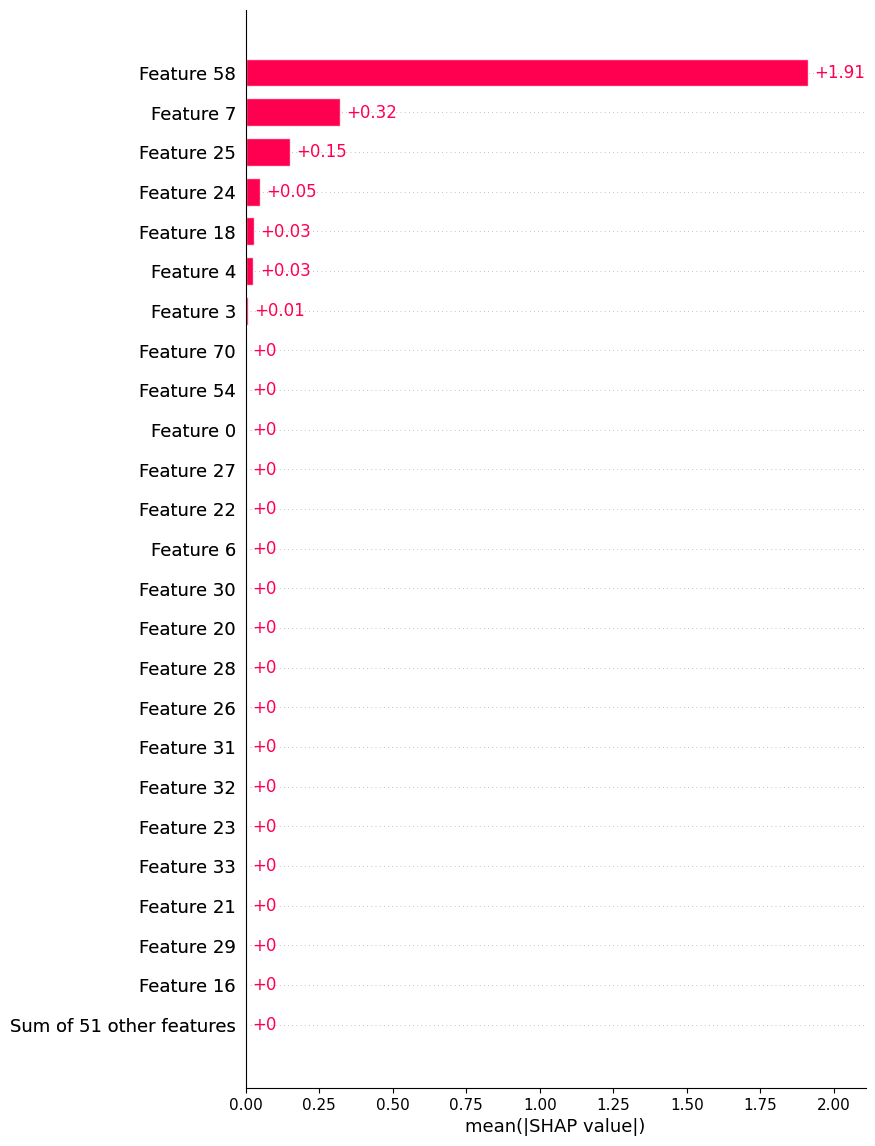

Class 2 bar plot:


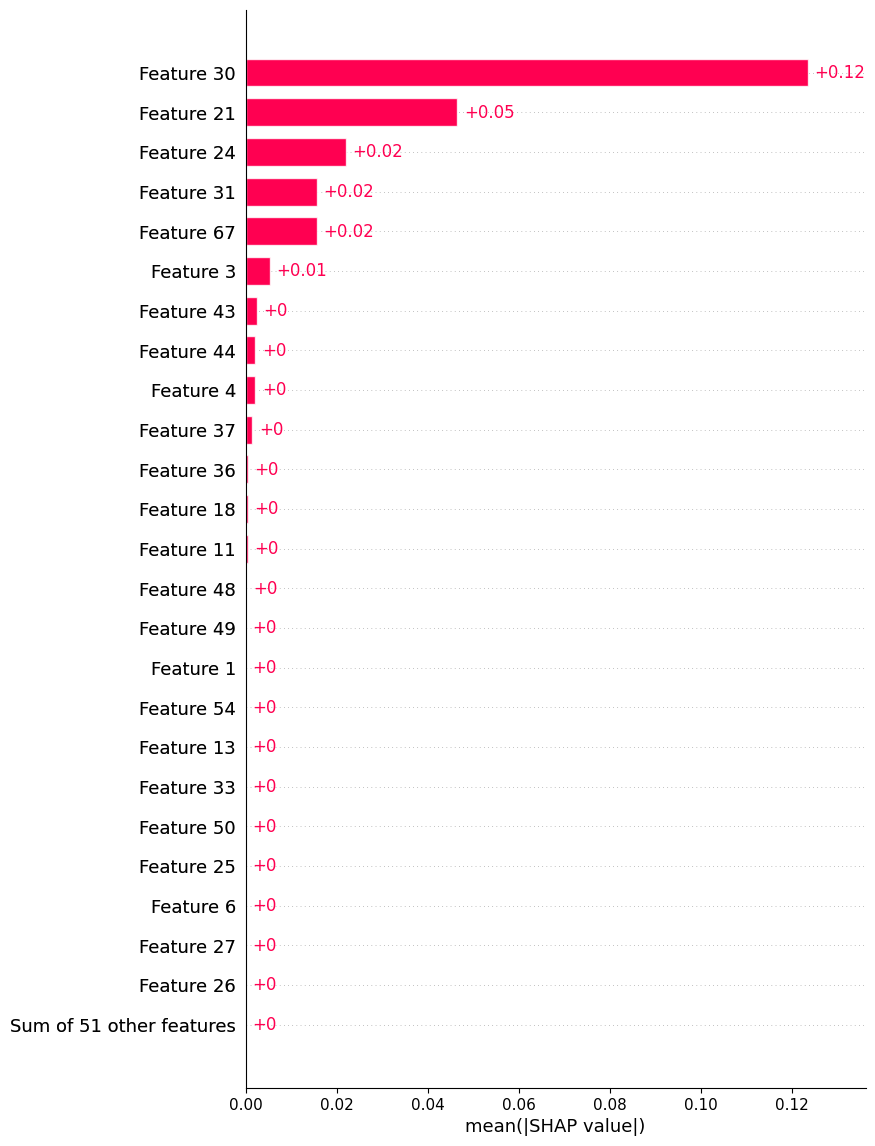

Class 3 bar plot:


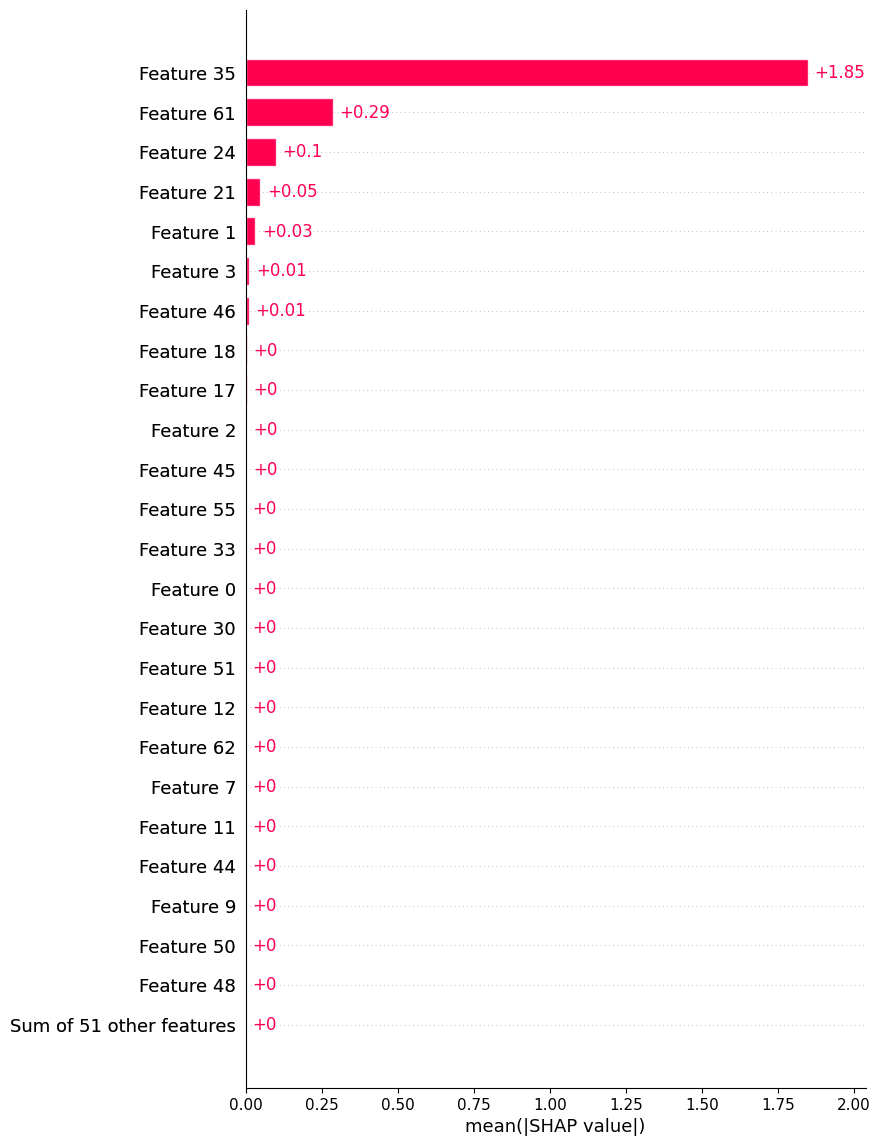

Class 4 bar plot:


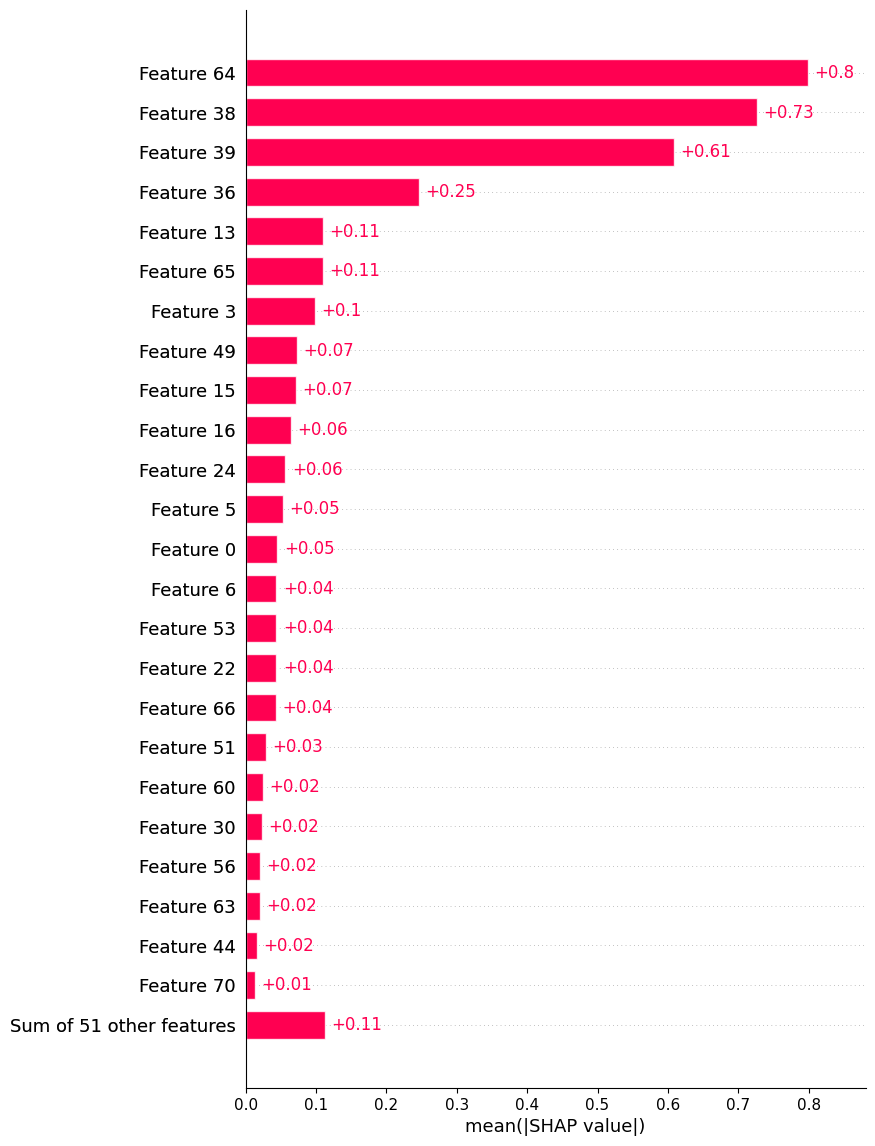

Class 5 bar plot:


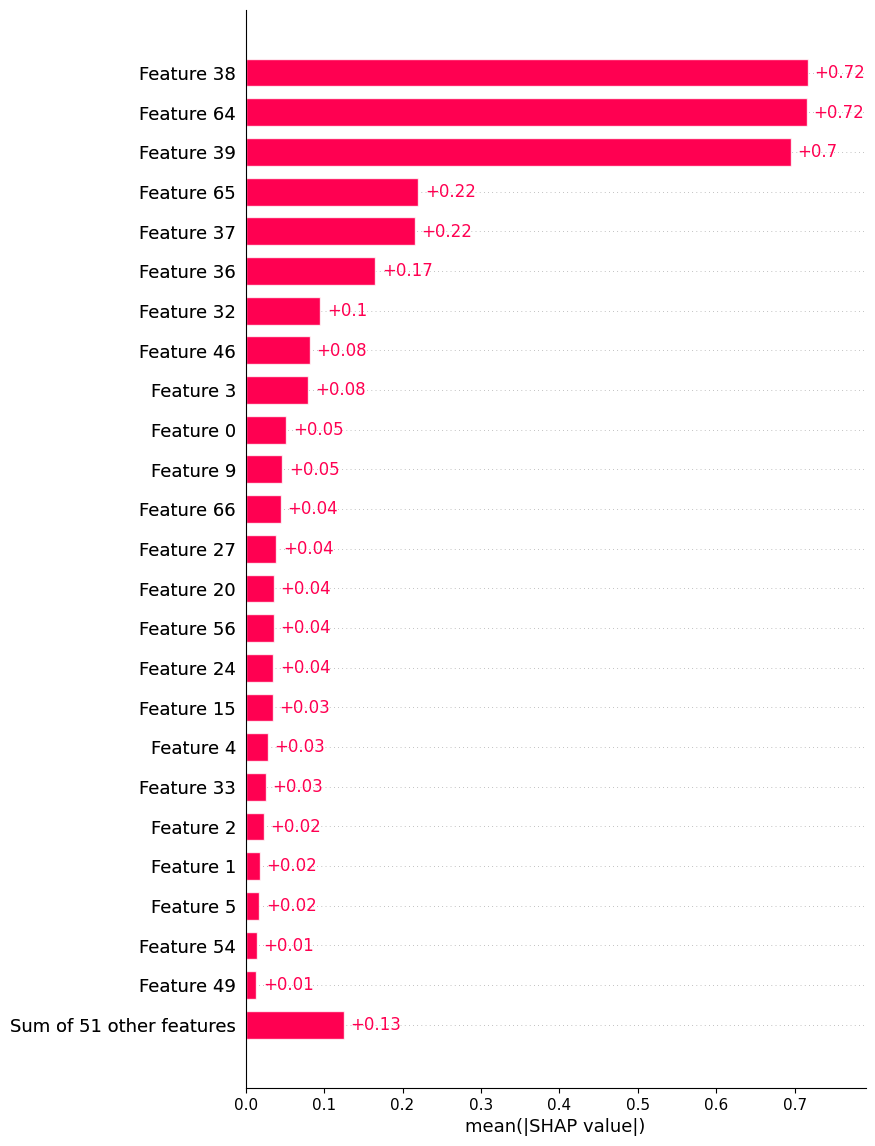

Class 6 bar plot:


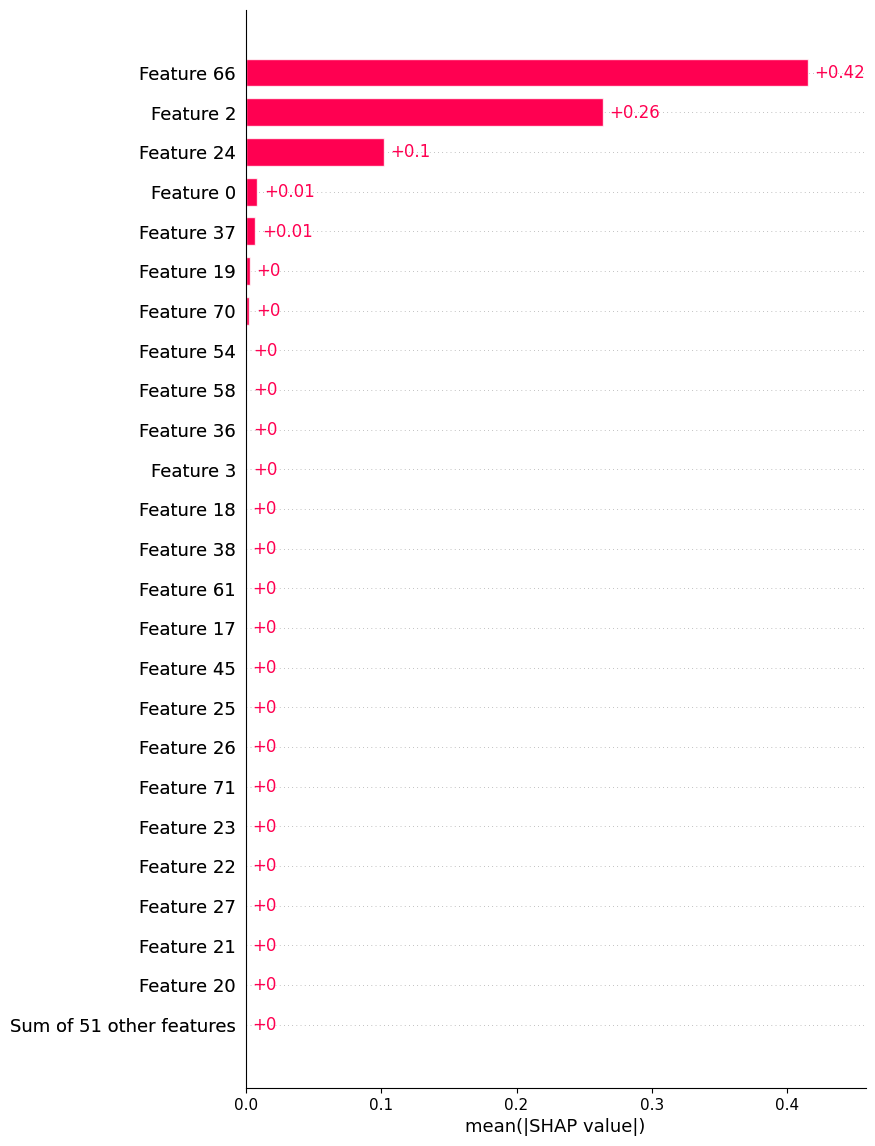

Class 7 bar plot:


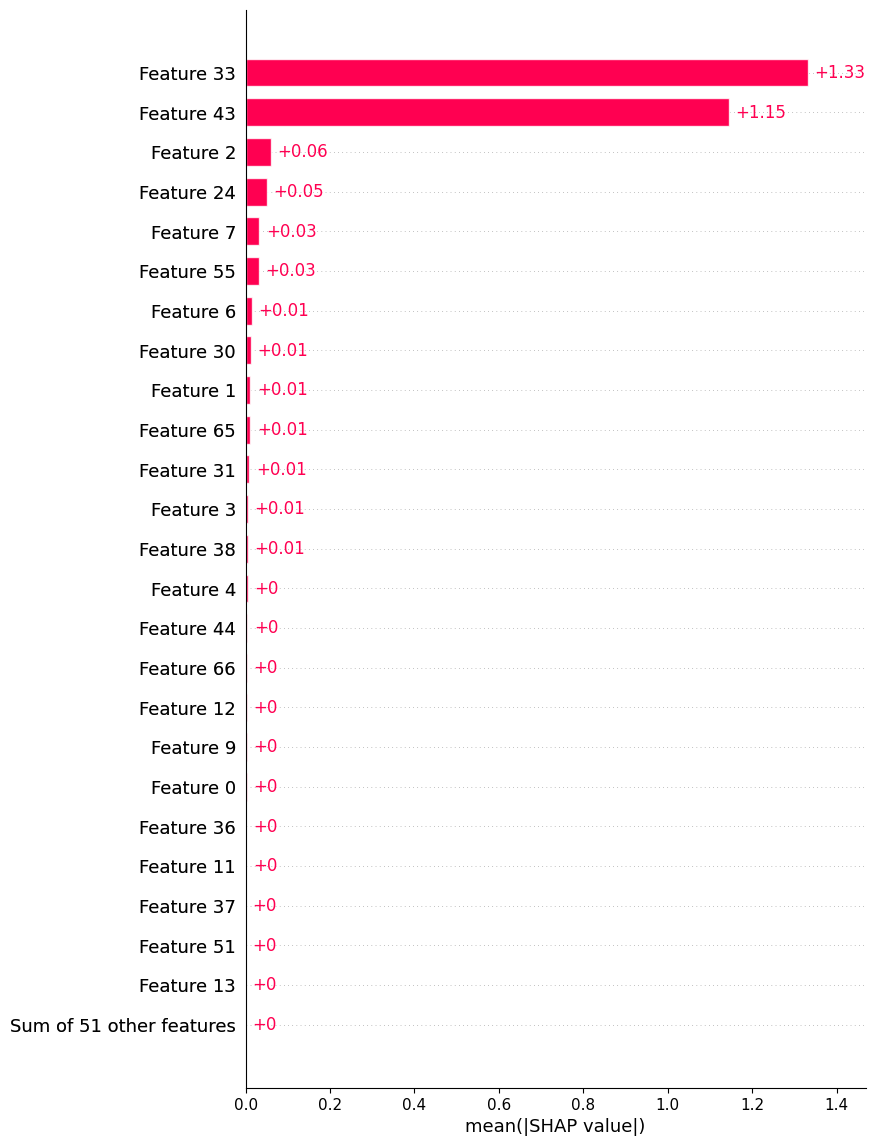

Class 8 bar plot:


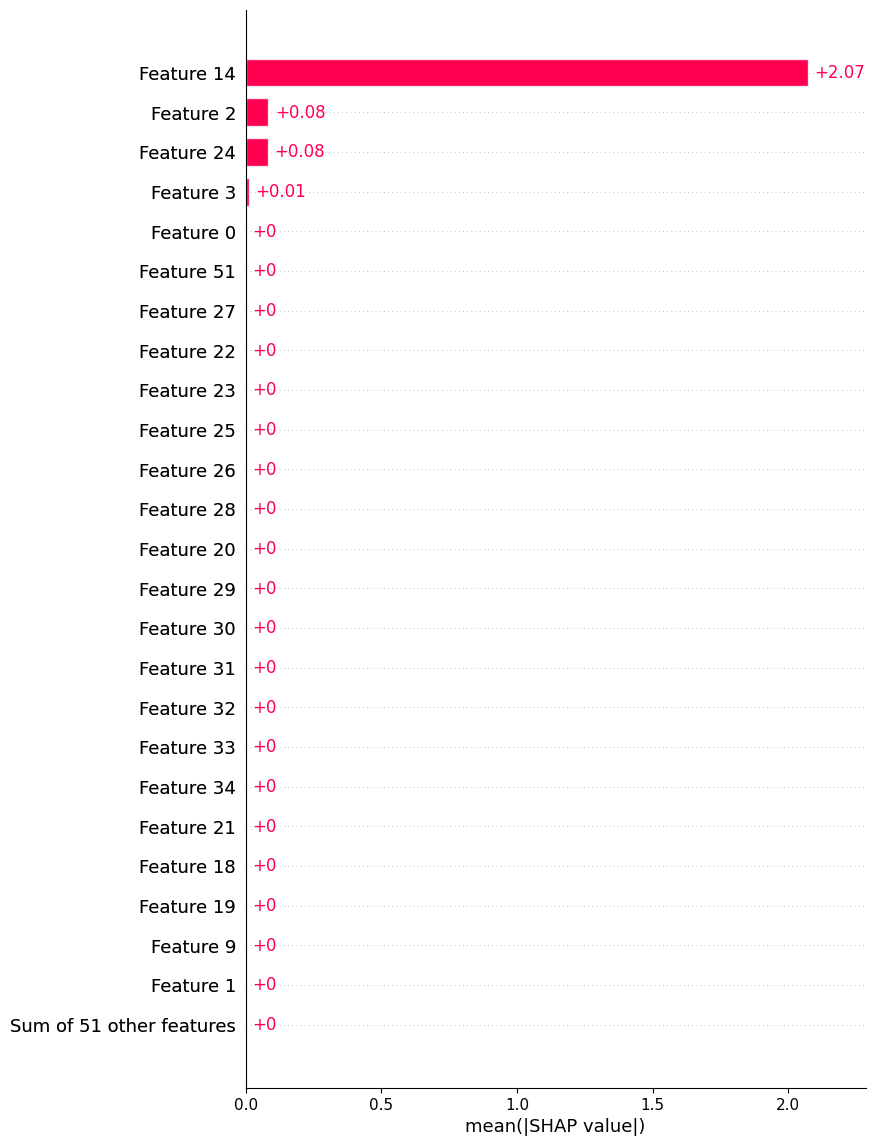

Class 9 bar plot:


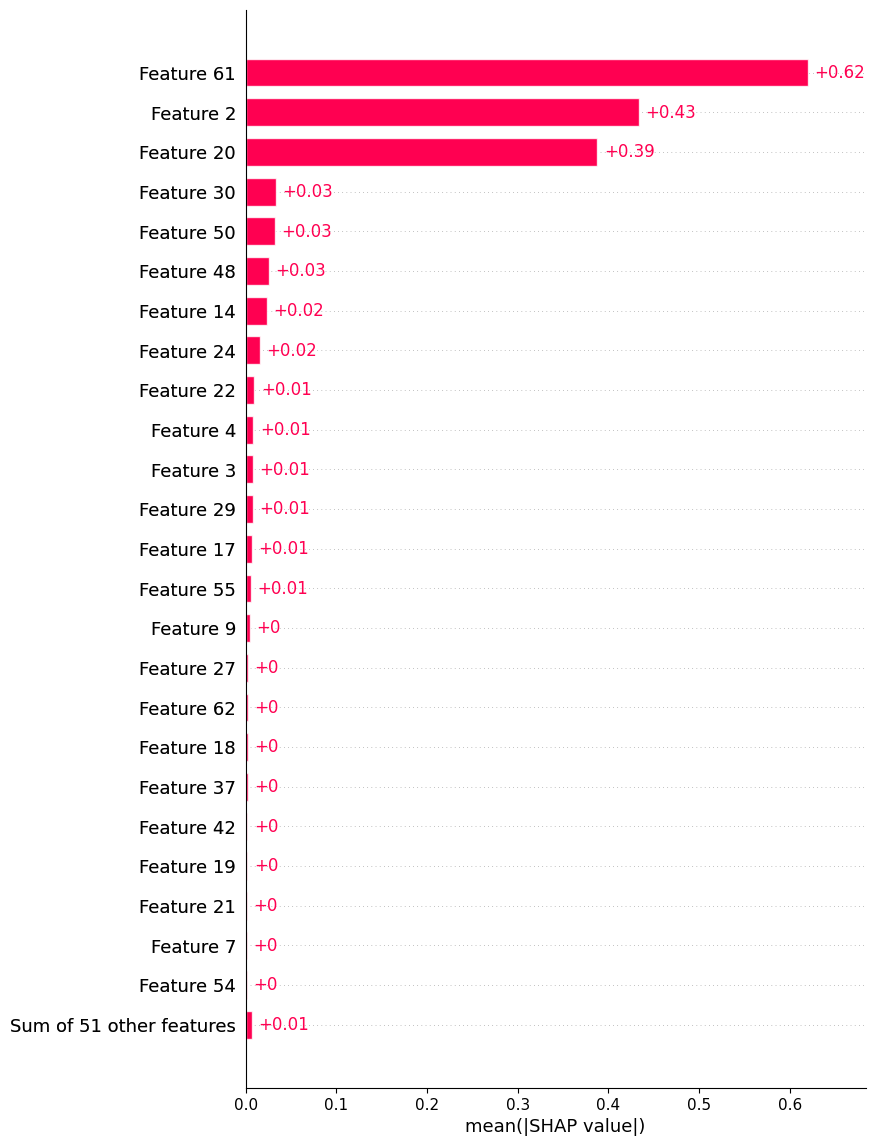

Class 10 bar plot:


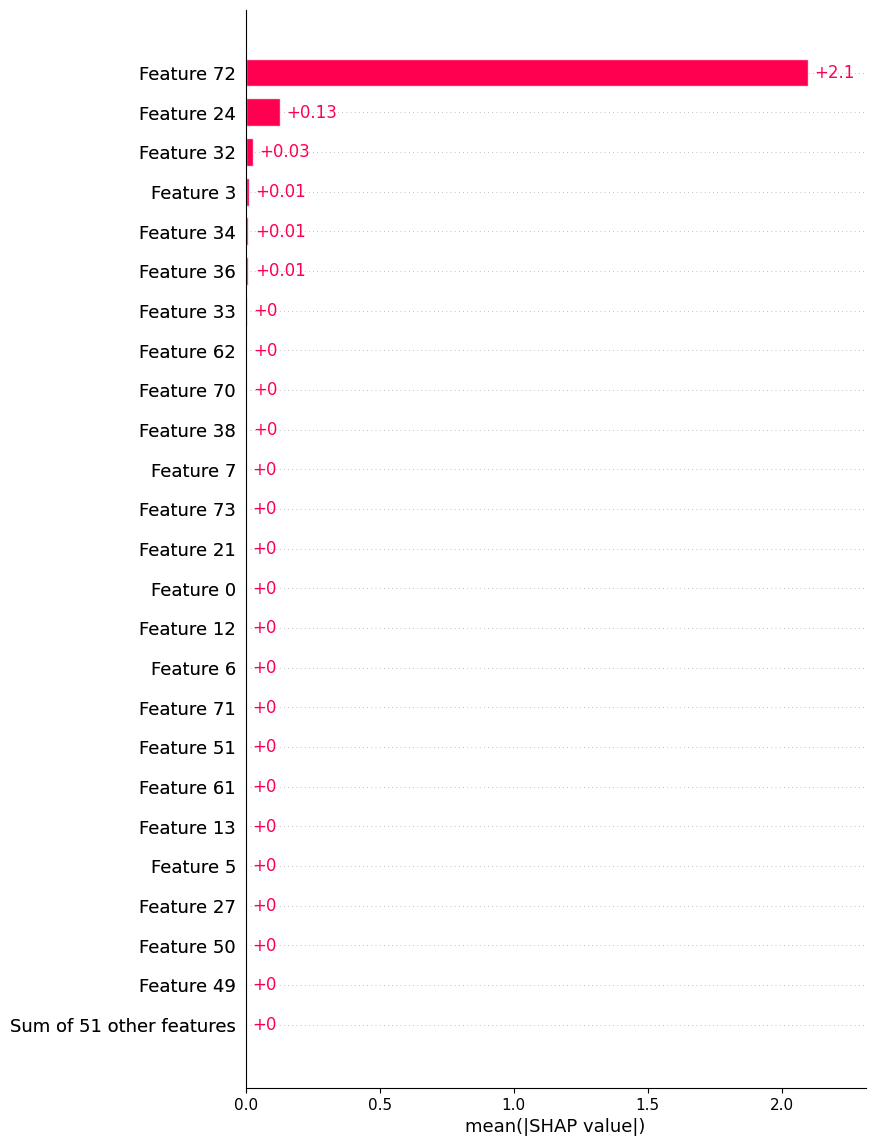

Class 11 bar plot:


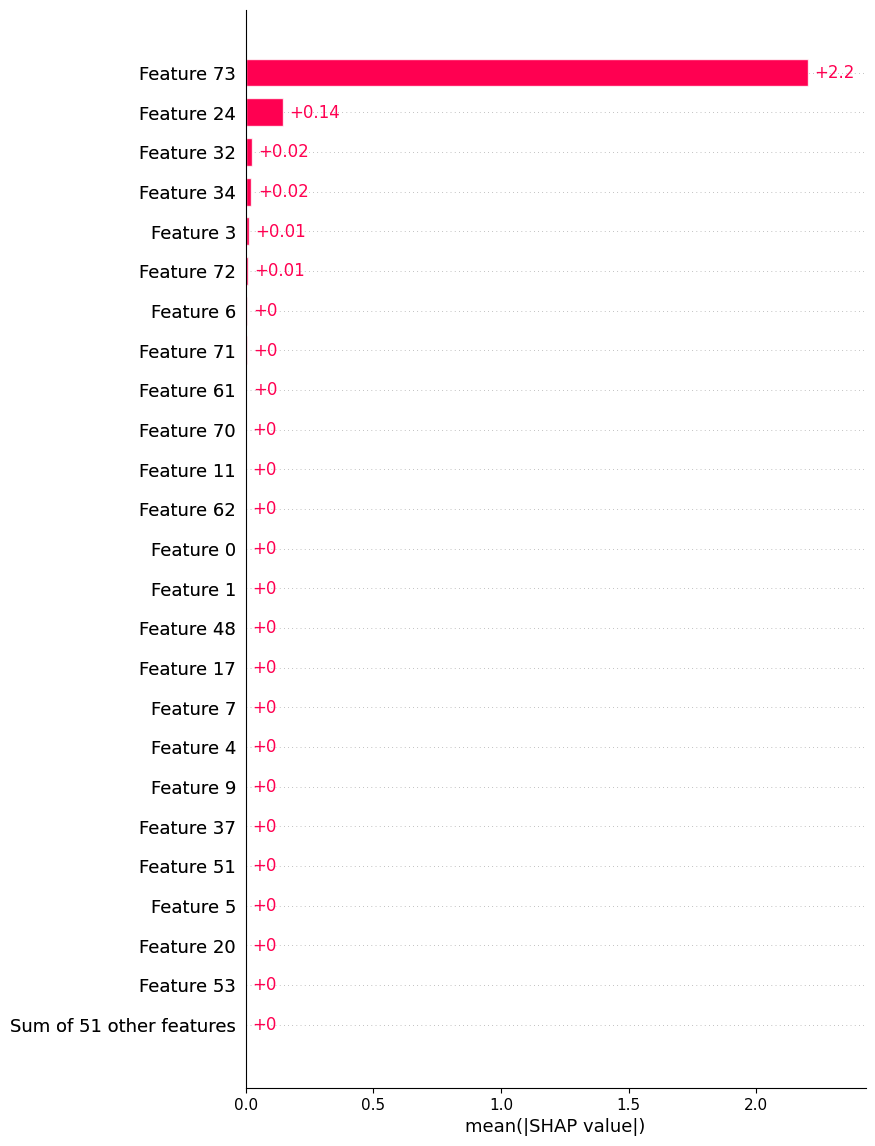

Class 12 bar plot:


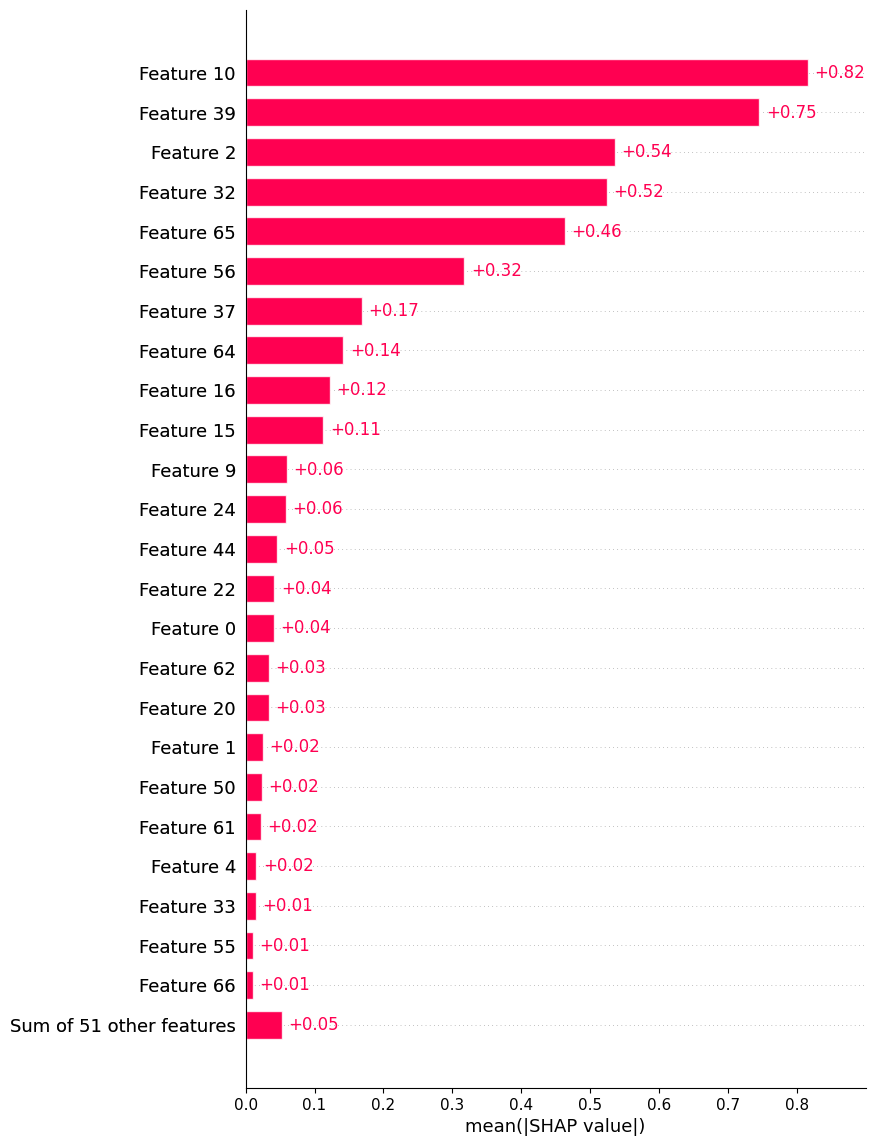

Class 13 bar plot:


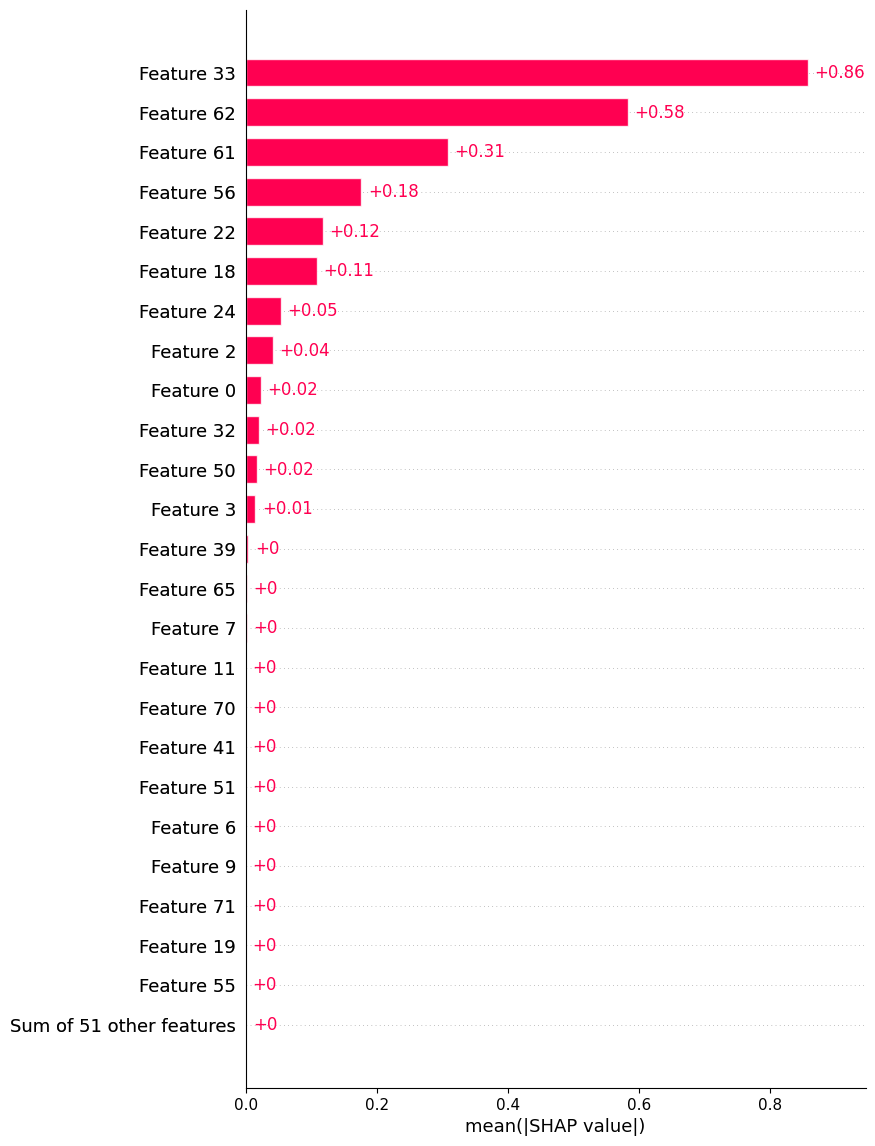

Class 14 bar plot:


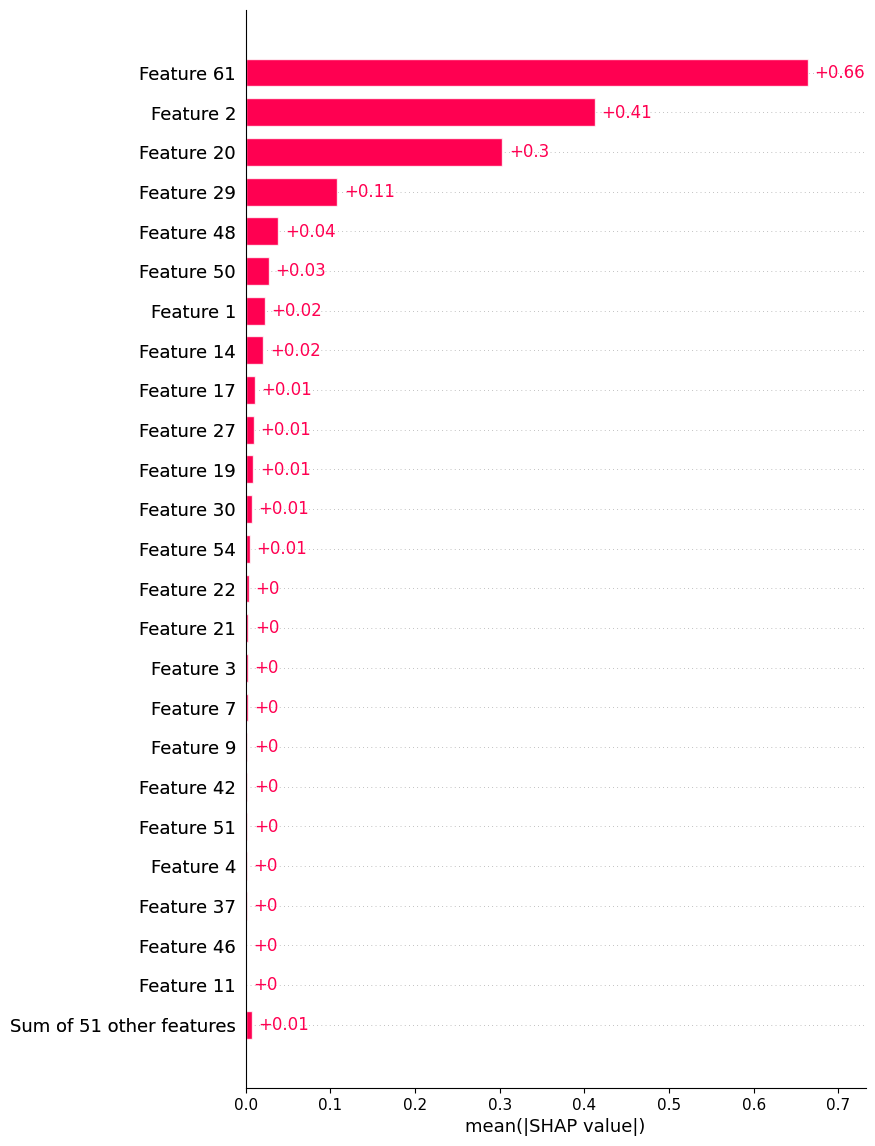

Class 15 bar plot:


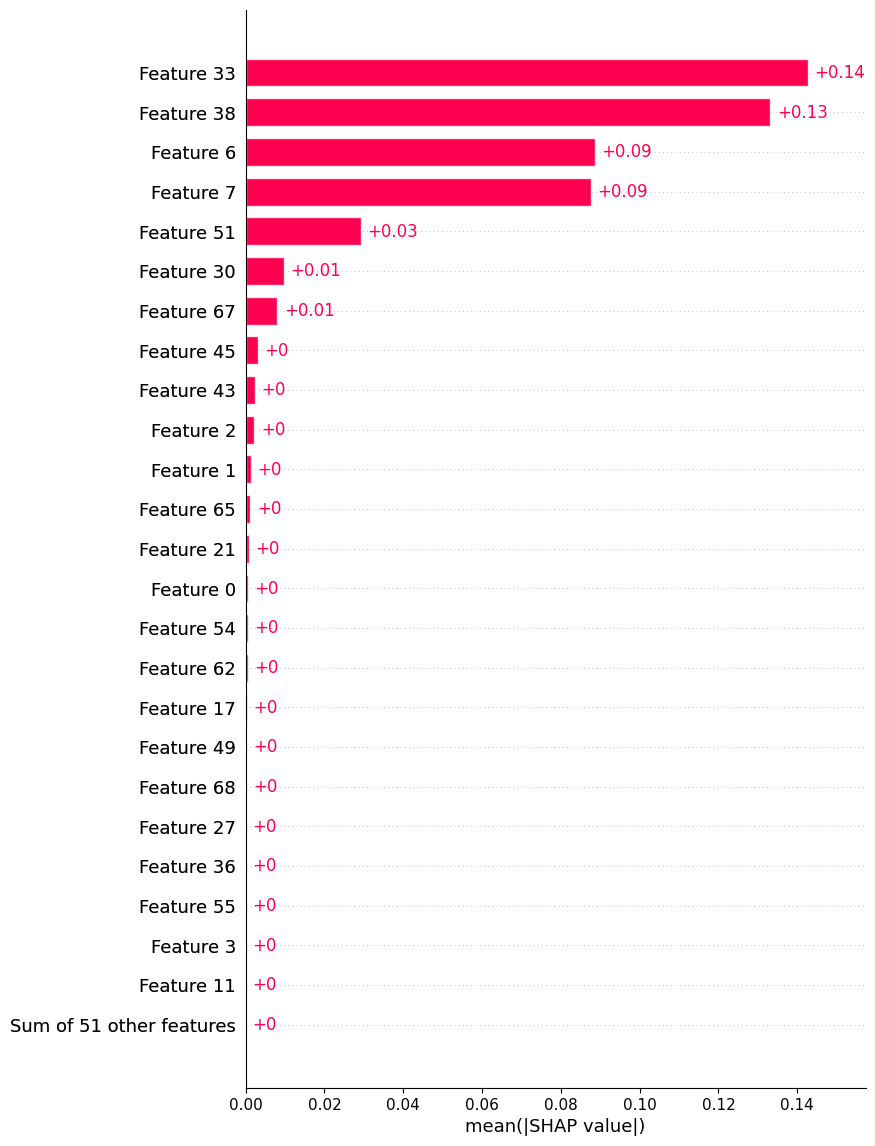

In [22]:
for class_idx in range(16):
    print(f"Class {class_idx} bar plot:")
    shap.plots.bar(shap_values[:, :, class_idx],max_display=25)

---

In [23]:
feature_names = train.columns.tolist()
feature_names

['DNBR',
 'DTHY',
 'DWB',
 'HLW',
 'HTR',
 'HUP',
 'LSGA',
 'LSGB',
 'LVCR',
 'LVPZ',
 'LWRB',
 'NSGA',
 'NSGB',
 'P',
 'PPM',
 'PRB',
 'PRBA',
 'PSGA',
 'PSGB',
 'PWNT',
 'PWR',
 'QMGA',
 'QMGB',
 'QMWT',
 'RBLK',
 'RC131',
 'RC87',
 'RH',
 'RHBR',
 'RHFL',
 'RHMT',
 'RHRD',
 'RM1',
 'RM2',
 'RM3',
 'RM4',
 'SCMA',
 'SCMB',
 'SGLK',
 'STRB',
 'STSG',
 'STTB',
 'TAVG',
 'TBLD',
 'TCA',
 'TCB',
 'TF',
 'TFPK',
 'TFSB',
 'THA',
 'THB',
 'TPCT',
 'TRB',
 'TSAT',
 'VOID',
 'VOL',
 'WBK',
 'WCFT',
 'WCHG',
 'WCSP',
 'WECS',
 'WFWA',
 'WFWB',
 'WHPI',
 'WLR',
 'WRCA',
 'WRCB',
 'WRLA',
 'WRLB',
 'WSPY',
 'WSTA',
 'WSTB',
 'WTRA',
 'WTRB',
 'WUP']

import pandas as pd
import numpy as np
path = "Operation_OPR1000/"

test1 = pd.read_csv(path + "LOCA/LOCA_OPR1000_250_1.csv")
test1 = test1[common_columns2]
test2 = pd.read_csv(path + "LOCAC/LOCAC_OPR1000_250_1.csv")
test2 = test2[common_columns2]

test1 = test1[test1['TIME'] <= 4000]
test2 = test2[test2['TIME'] <= 4000]

test1 = test1[test1['TIME'] % 60 == 0]
test2 = test2[test2['TIME'] % 60 == 0]

test1 = test1.drop('TIME', axis = 1)
test2 = test2.drop('TIME', axis = 1)

X1 = create_features_from_df(test1, window_size)
X2 = create_features_from_df(test2, window_size)

pred1 = xgb_model.predict(X1)
pred2 = xgb_model.predict(X2)

pred1 = pred1.tolist()
print(pred1)

pred2 = pred2.tolist()
print(pred2)

---

---

path = "Operation_csv_data/"
ATWS = pd.read_csv(path+"ATWS/1.csv", encoding = 'utf-8-sig')
FLB = pd.read_csv(path+"FLB/1.csv", encoding = 'utf-8-sig')
LACP = pd.read_csv(path+"LACP/1.csv", encoding = 'utf-8-sig')
LLB = pd.read_csv(path+"LLB/1.csv", encoding = 'utf-8-sig')
LOCA = pd.read_csv(path+"LOCA/1.csv", encoding = 'utf-8-sig')
LOCAC = pd.read_csv(path+"LOCAC/1.csv", encoding = 'utf-8-sig')
LOF = pd.read_csv(path+"LOF/1.csv", encoding = 'utf-8-sig')
LR = pd.read_csv(path+"LR/1.csv", encoding = 'utf-8-sig')
MD = pd.read_csv(path+"MD/1.csv", encoding = 'utf-8-sig')
Normal = pd.read_csv(path+"Normal/1.csv", encoding = 'utf-8-sig')
RI = pd.read_csv(path+"RI/-1.csv", encoding = 'utf-8-sig')
RW = pd.read_csv(path+"RW/1.csv", encoding = 'utf-8-sig')
SGATR = pd.read_csv(path+"SGATR/1.csv", encoding = 'utf-8-sig')
SGBTR = pd.read_csv(path+"SGBTR/1.csv", encoding = 'utf-8-sig')
SLBIC = pd.read_csv(path+"SLBIC/1.csv", encoding = 'utf-8-sig')
SLBOC = pd.read_csv(path+"SLBOC/1.csv", encoding = 'utf-8-sig')
SP = pd.read_csv(path+"SP/1.csv", encoding = 'utf-8-sig')
TT = pd.read_csv(path+"TT/1.csv", encoding = 'utf-8-sig')